<a href="https://colab.research.google.com/github/med-tz/elelction_Tunisie/blob/main/Source.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**chargement de tous les packages nécessaires**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns

from sklearn.model_selection import train_test_split

In [ ]:
## Affichage de plus de lignes pour les output
pd.options.display.max_rows = 500

**chargement de la base de donnee**

In [ ]:
drive.mount('/content/drive')
Base=pd.read_excel('/content/drive/MyDrive/Base.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Base.head(10)

,ID,BID,Kish1,Q1,Q2,Q3,Secteur,Block,Q4,Q5,Q6,Q7,Q8,Q8_AUTRES,Q9,Q9_AUTRES,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q19BIS,Q20,Q20BIS,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q21_10,Q22_1,...,Q22_9,Q23,Q25,Q26,Q27,Q28A,Q28B,Q30,Q31,Q32_1,Q32_2,Q32_3,Q34_A,Q34_B,Q34_C,Q34_D,Q34_E,Q34_F,Q34_G,Q34_H,Q34_I,Q34_J,Q34_K,Q35_A,Q35_B,Q35_C,Q35_D,Q35_E,Q35_F,Q35_G,Q35_H,Q52,Q53,Q54,Q55,Pondération1,Pondération2,Pondération3,PoidsInitial,Poids
0,1,1,1,1,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,27,NaN,1,3.0,NaN,NaN,NaN,3.0,2,1,NaN,1,1,1,4,4,98,NaN,2,2.0,3,1,3,2,2,2,3,2,2,3,2,...,2,1,2.0,2.0,2.0,4,5.0,6,2,3,6.0,5.0,3,2,3,3,2,2,3,2,2,3,4,2,4,3,2,3,5,2,2,10,1,3,1,1.693877,1.123561,1.033677,478.352606,602.470102
1,2,1,2,2,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,37,NaN,2,NaN,NaN,4.0,NaN,NaN,2,2,4.0,1,1,1,4,4,1,2.0,8,2.0,2,3,3,2,3,3,3,2,3,3,2,...,2,1,NaN,NaN,NaN,5,1.0,1,1,3,6.0,4.0,3,3,3,4,2,2,3,2,2,3,4,2,3,3,3,3,3,3,2,4,2,4,3,0.853806,0.645277,0.636774,956.705212,995.519830
2,3,1,2,1,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,22,NaN,1,2.0,NaN,NaN,NaN,3.0,1,2,4.0,1,1,98,4,3,98,NaN,96,2.0,3,3,99,3,99,99,3,3,99,99,3,...,3,1,NaN,NaN,NaN,2,10.0,3,3,6,8.0,9.0,3,2,5,4,5,5,4,3,5,5,4,3,3,3,3,3,3,2,2,10,1,6,2,1.849603,1.290227,1.213185,956.705212,1094.787094
3,4,1,3,2,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,53,NaN,1,3.0,NaN,NaN,NaN,1.0,2,1,NaN,1,98,98,2,4,2,2.0,1,1.0,1,3,3,3,3,3,3,3,3,3,2,...,3,2,98.0,1.0,98.0,5,98.0,3,5,3,97.0,NaN,1,5,5,5,5,5,5,5,5,5,2,2,2,5,5,2,5,5,5,5,2,4,3,0.855732,0.817558,0.559571,1435.057818,537.636292
4,5,1,3,1,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,27,NaN,1,2.0,NaN,NaN,NaN,1.0,2,2,4.0,1,1,1,3,4,96,1.0,2,1.0,99,1,2,2,99,99,3,3,99,99,3,...,3,1,NaN,NaN,NaN,1,9.0,4,5,3,8.0,5.0,4,1,2,4,5,5,4,4,5,5,3,3,3,3,3,5,5,2,5,9,1,4,2,1.693877,1.078874,1.017732,1435.057818,1642.180641
5,6,1,2,2,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,30,NaN,2,NaN,NaN,4.0,NaN,NaN,1,1,NaN,1,1,98,4,3,97,1.0,5,1.0,97,3,3,3,1,99,3,97,99,99,3,...,3,98,2.0,2.0,97.0,8,1.0,6,5,3,8.0,97.0,3,3,3,3,2,3,3,3,3,3,3,98,98,98,98,98,5,5,5,9,2,4,3,1.484786,1.023257,0.947754,956.705212,977.646335
6,7,1,2,1,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,53,NaN,1,3.0,NaN,NaN,NaN,3.0,2,1,NaN,1,1,1,2,1,9,2.0,2,1.0,3,1,3,3,2,2,3,3,3,3,2,...,3,1,2.0,2.0,97.0,9,1.0,4,2,8,4.0,3.0,3,1,4,2,2,2,3,3,3,4,2,2,3,3,2,4,3,4,2,7,2,3,2,0.893351,0.671736,0.662695,956.705212,722.904039
7,8,1,3,2,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,49,NaN,2,NaN,NaN,4.0,NaN,NaN,2,1,NaN,1,98,98,4,1,97,2.0,98,NaN,2,2,2,2,2,97,2,99,97,2,97,...,99,98,98.0,98.0,97.0,1,10.0,98,1,98,NaN,NaN,98,98,98,98,98,98,98,5,5,98,98,98,98,98,98,98,98,98,98,3,2,6,2,1.238651,1.247599,1.121917,1435.057818,1439.868275
8,9,1,6,1,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,59,NaN,1,3.0,NaN,NaN,NaN,1.0,1,1,NaN,1,1,1,1,1,2,1.0,9,2.0,3,3,2,2,3,3,3,2,2,3,1,...,2,2,2.0,1.0,97.0,9,4.0,4,1,3,6.0,97.0,3,3,1,1,3,3,3,1,2,3,1,2,3,4,4,4,4,3,2,10,2,4,2,0.787331,0.482712,0.297768,2870.115637,861.071485
9,10,1,5,2,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,55,NaN,2,NaN,NaN,4.0,NaN,NaN,2,1,NaN,1,1,2,2,1,2,1.0,5,1.0,2,1,3,3,1,1,3,2,3,3,1,...,2,1,7.0,2.0,97.0,10,97.0,4,3,6,8.0,97.0,3,1,2,2,1,2,4,2,5,3,3,3,98,4,2,4,5,4,98,5,2,5,1,0.719912,0.867008,0.866951,2391.763030,1665.694505


**split de la base en test et train**

In [ ]:
train,test = train_test_split(Base, test_size = 0.3, random_state = 123)
train=train.reset_index()
train=train.drop(['index'], axis=1)
test=test.reset_index()
test=test.drop(['index'], axis=1)

In [ ]:
train.head()

,ID,BID,Kish1,Q1,Q2,Q3,Secteur,Block,Q4,Q5,Q6,Q7,Q8,Q8_AUTRES,Q9,Q9_AUTRES,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q19BIS,Q20,Q20BIS,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q21_10,Q22_1,...,Q22_9,Q23,Q25,Q26,Q27,Q28A,Q28B,Q30,Q31,Q32_1,Q32_2,Q32_3,Q34_A,Q34_B,Q34_C,Q34_D,Q34_E,Q34_F,Q34_G,Q34_H,Q34_I,Q34_J,Q34_K,Q35_A,Q35_B,Q35_C,Q35_D,Q35_E,Q35_F,Q35_G,Q35_H,Q52,Q53,Q54,Q55,Pondération1,Pondération2,Pondération3,PoidsInitial,Poids
0,3978,332,3,2,8,Nefza,Ouachtata,Ouachtata 2,2,998,5.0,2,NaN,NaN,1.0,NaN,NaN,2,1,NaN,1,2,98,2,98,98,NaN,96,1.0,97,3,3,3,3,3,3,1,99,99,3,...,3,2,1.0,1.0,1.0,3,98.0,98,98,8,3.0,5.0,2,3,3,3,3,3,2,98,5,5,2,3,3,3,3,3,3,3,3,1,3,6,2,1.013224,0.859502,0.801149,539.350085,853.381981
1,7853,655,2,1,14,Meknassy,Meknassy Est,Meknassy Est 10,1,50,NaN,2,NaN,NaN,1.0,NaN,NaN,2,1,NaN,1,1,1,1,3,98,NaN,98,NaN,99,99,99,99,99,99,99,99,99,99,99,...,99,1,99.0,99.0,99.0,3,10.0,1,4,3,6.0,5.0,98,5,5,5,5,5,5,98,5,98,5,5,5,5,5,5,5,98,5,5,2,6,2,0.571798,0.744608,0.662738,414.490134,265.472835
2,237,20,2,1,1,Ezzouhour,Bach-Hamba,Bach-Hamba 19,1,40,NaN,1,6.0,NaN,NaN,NaN,4.0,2,1,NaN,1,1,1,2,1,12,2.0,8,2.0,3,3,2,3,2,2,3,1,3,3,3,...,1,1,1.0,1.0,97.0,9,1.0,1,2,3,8.0,6.0,4,4,2,4,2,2,4,1,5,4,4,4,3,3,2,5,5,2,1,5,2,4,2,0.974041,0.819628,0.685272,723.091149,406.574018
3,5543,462,5,1,15,Sidi El Héni,Sidi El Héni Centre,Sidi El Héni Centre 4,1,19,NaN,2,NaN,NaN,1.0,NaN,NaN,2,2,4.0,1,1,1,4,4,2,2.0,96,1.0,3,3,3,2,3,3,3,3,3,3,2,...,3,1,NaN,NaN,NaN,10,1.0,3,2,3,6.0,8.0,4,2,4,2,4,4,4,4,4,4,1,2,4,4,4,4,4,3,4,4,1,6,2,2.152800,1.866211,1.865003,1794.217343,1073.801664
4,3566,298,5,2,5,Saouaf,Deghafla Ouest,Deghafla Ouest,2,54,NaN,2,NaN,NaN,1.0,NaN,NaN,2,1,NaN,1,98,98,4,98,98,NaN,98,NaN,97,99,99,99,99,99,99,99,99,99,99,...,99,98,98.0,97.0,97.0,3,1.0,98,5,8,2.0,97.0,98,5,5,5,5,5,5,5,5,5,2,5,5,5,5,5,5,5,5,1,2,6,2,0.596075,0.588361,1.177493,539.783491,833.638926


In [ ]:
test.head()

,ID,BID,Kish1,Q1,Q2,Q3,Secteur,Block,Q4,Q5,Q6,Q7,Q8,Q8_AUTRES,Q9,Q9_AUTRES,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q19BIS,Q20,Q20BIS,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q21_10,Q22_1,...,Q22_9,Q23,Q25,Q26,Q27,Q28A,Q28B,Q30,Q31,Q32_1,Q32_2,Q32_3,Q34_A,Q34_B,Q34_C,Q34_D,Q34_E,Q34_F,Q34_G,Q34_H,Q34_I,Q34_J,Q34_K,Q35_A,Q35_B,Q35_C,Q35_D,Q35_E,Q35_F,Q35_G,Q35_H,Q52,Q53,Q54,Q55,Pondération1,Pondération2,Pondération3,PoidsInitial,Poids
0,1249,105,4,1,3,Bou Mhel El Bassatine,El Bassatine,El Bassatine 21,1,54,NaN,1,7.0,NaN,NaN,NaN,1.0,2,1,NaN,1,1,1,1,4,1,1.0,1,1.0,1,3,1,3,3,3,3,3,3,3,3,...,3,2,1.0,1.0,6.0,2,8.0,4,4,3,6.0,8.0,2,3,2,3,3,4,4,3,3,3,4,3,3,4,3,3,3,4,3,7,2,4,2,1.082103,0.892018,0.760968,1766.159371,766.218477
1,2852,238,4,2,26,Takelsa,Takelsa Centre,Takelsa Centre 9,1,63,NaN,2,NaN,NaN,4.0,NaN,NaN,2,1,NaN,1,1,98,4,1,98,NaN,8,2.0,2,3,3,3,3,2,2,2,2,2,3,...,3,2,98.0,2.0,98.0,7,98.0,3,3,3,4.0,2.0,3,3,5,5,5,98,98,98,98,98,2,5,5,5,5,5,5,98,5,2,2,6,2,0.829884,0.835953,1.023971,683.124038,680.987430
2,6125,511,2,1,17,Bou Merdès,Bou Merdes,Bou Merdes 5,1,37,NaN,1,7.0,NaN,NaN,NaN,5.0,2,1,NaN,1,98,98,4,1,5,2.0,3,2.0,3,3,1,3,99,99,1,3,3,3,3,...,1,1,1.0,1.0,1.0,1,5.0,3,4,6,2.0,3.0,2,4,1,3,5,5,3,1,5,4,1,4,4,4,4,4,5,5,3,2,2,4,2,0.997230,0.850363,0.724169,429.094266,509.220807
3,7282,607,5,2,27,Skhira,Skhira,Skhira 21,1,998,5.0,2,NaN,NaN,4.0,NaN,NaN,2,1,NaN,1,98,98,2,2,96,1.0,10,1.0,1,3,3,99,99,99,2,99,99,2,99,...,99,1,97.0,97.0,97.0,8,1.0,98,1,8,96.0,97.0,1,1,5,2,5,5,98,5,5,1,1,5,1,5,5,1,5,5,1,1,2,3,1,1.820406,3.303099,4.449546,1156.321315,2068.529999
4,4452,371,3,2,10,Tajerouine,Cité Bourguiba,Cité Bourguiba 2,1,21,NaN,2,NaN,NaN,1.0,NaN,NaN,2,1,NaN,1,1,1,2,4,97,1.0,97,1.0,3,3,3,3,3,3,3,3,3,3,3,...,3,1,97.0,97.0,6.0,1,4.0,4,5,3,5.0,8.0,4,3,5,3,2,5,2,2,5,2,2,3,4,2,5,2,5,2,2,9,1,6,2,0.704232,1.201245,1.506286,456.050537,494.879557


**Stat desc**

In [ ]:
print("Taille de la base : ",Base.shape)

Taille de la base :  (11000, 87)


87 features

*  **type des variables**




In [ ]:
Base.dtypes

ID                int64
BID               int64
Kish1             int64
Q1                int64
Q2                int64
Q3               object
Secteur          object
Block            object
Q4                int64
Q5                int64
Q6              float64
Q7                int64
Q8              float64
Q8_AUTRES        object
Q9              float64
Q9_AUTRES        object
Q10             float64
Q11               int64
Q12               int64
Q13             float64
Q14               int64
Q15               int64
Q16               int64
Q17               int64
Q18               int64
Q19               int64
Q19BIS          float64
Q20               int64
Q20BIS          float64
Q21_1             int64
Q21_2             int64
Q21_3             int64
Q21_4             int64
Q21_5             int64
Q21_6             int64
Q21_7             int64
Q21_8             int64
Q21_9             int64
Q21_10            int64
Q22_1             int64
Q22_2             int64
Q22_3           

*   **Analyse de la Target** 

Plusieurs features peuvent etre traitées comme target dans cette base. On fera le Stat descriptives des features qui peuvent etre traitées comme target.

###  Q19: Imaginons que les élections législatives pour élire un député à l’assemblé des
représentants du peuple aient lieu dimanche prochain et que vous ayez le choix entre
les listes suivantes, pour laquelle y aurait-il le plus de chances que vous votiez ?

In [ ]:
set(Base["Q19"].values)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 95, 96, 97, 98, 99}

refus                    3028
Ne sait pas              2239
Ennahda                  1227
autre                     989
Nidaa Tounes              879
abstension                752
Front Populaire           558
Courant Démocratique      270
Ne connait pas            236
Afek Tounes               188
Courant de l`Amour        149
Machrou Tounes            135
UPL                        96
Voterait blanc ou nul      95
Al Joumhouri               82
Irada                      49
Albadil                    28
Name: Q19, dtype: int64


Text(0.5, 1.0, 'Q19')

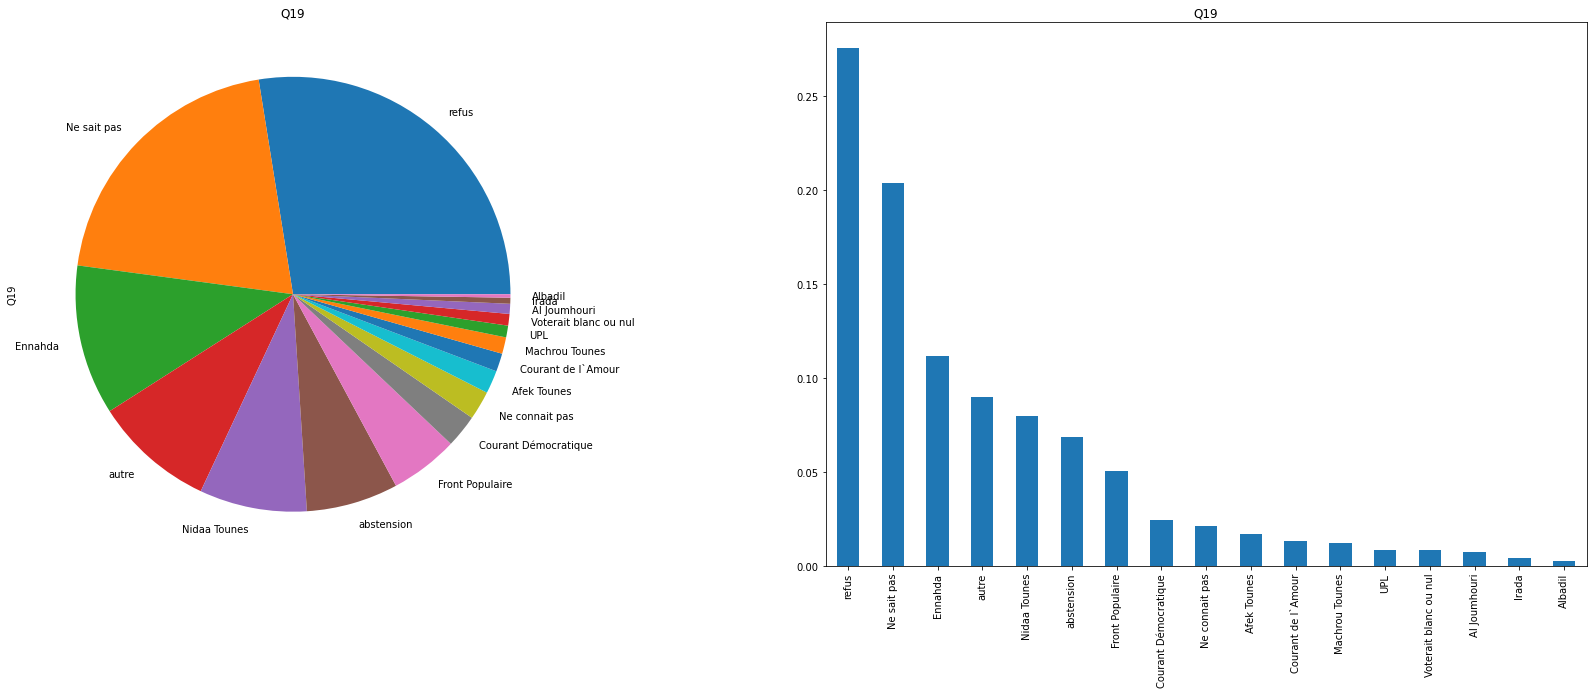

In [ ]:
copy = Base.copy()
varc='Q19'
Dict={1:"Nidaa Tounes",2:"Ennahda",3:"Front Populaire",4:"UPL",5:"Afek Tounes",6:"Al Joumhouri",7:"Machrou Tounes",8:"Irada",9:"Courant Démocratique",
      10:"Courant de l`Amour",11:"Albadil",12:"autre",95:"Voterait blanc ou nul",96:"abstension",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
#Apercu générale sur la variable
print(copy[varc].value_counts())

plt.figure(figsize=(30,10))

#Distribution de la variable
plt.subplot(1,2,1)
copy[varc].value_counts(normalize=True).plot(kind='pie')
plt.title(varc)

#Distribution de la variable  
plt.subplot(1,2,2)
copy[varc].value_counts(normalize=True).plot(kind='bar')
plt.title(varc)

###  Q20: Imaginons que les élections présidentielles pour élire le président d
république aient lieu dimanche prochain et que vous ayez le choix entre les
personnalités suivantes, pour laquelle y aurait-il le plus de chances que vous votiez ?


refus                2076
Youssef Chahed       1557
Ne sait pas          1466
Moncef Marzouki      1310
Samia Abbou           807
96                    681
Hamma Hammani         653
Beji Caïd Essebsi     586
Mehdi Jomaa           577
Kamel Morjan          359
Mohammed Abbou        309
Rached Ghannouchi     276
Ne connait pas        174
Mohsen Marzouk        123
95                     46
Name: Q20, dtype: int64


Text(0.5, 1.0, 'Q20')

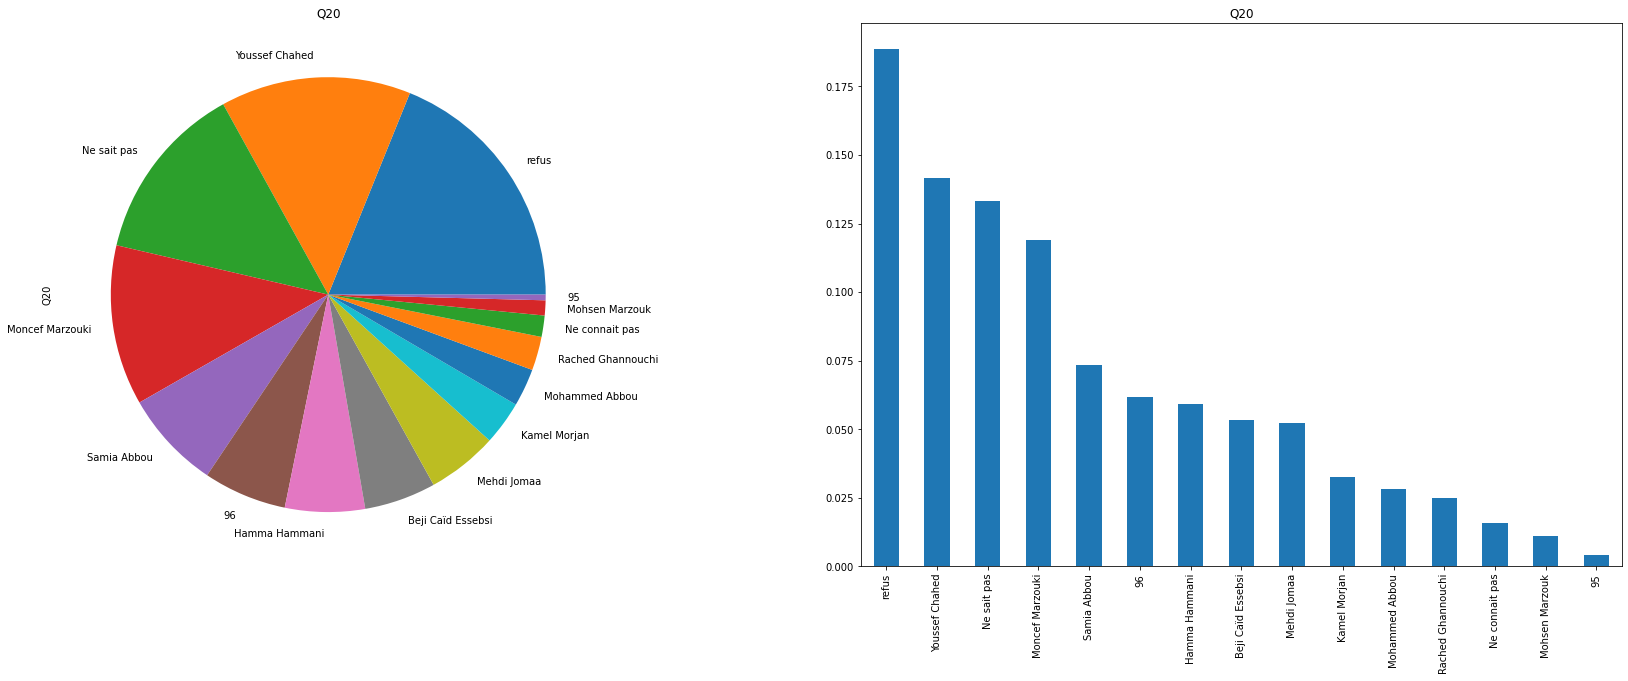

In [ ]:
copy = Base.copy()
varc='Q20'
Dict={1:"Beji Caïd Essebsi",2:"Moncef Marzouki",3:"Mehdi Jomaa",4:"Rached Ghannouchi",5:"Samia Abbou",6:"Mohammed Abbou",7:"Hamma Hammani",8:"Youssef Chahed",9:"Kamel Morjan",
      10:"Mohsen Marzouk",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
#Apercu générale sur la variable
print(copy[varc].value_counts())

plt.figure(figsize=(30,10))

#Distribution de la variable
plt.subplot(1,2,1)
copy[varc].value_counts(normalize=True).plot(kind='pie')
plt.title(varc)

#Distribution de la variable  
plt.subplot(1,2,2)
copy[varc].value_counts(normalize=True).plot(kind='bar')
plt.title(varc)

In [ ]:
Base["groupe d'age"]= pd.cut(Base.Q5,bins=[0,25,50,75,100])

In [ ]:
Base

,ID,BID,Kish1,Q1,Q2,Q3,Secteur,Block,Q4,Q5,Q6,Q7,Q8,Q8_AUTRES,Q9,Q9_AUTRES,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q19BIS,Q20,Q20BIS,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q21_10,Q22_1,...,Q23,Q25,Q26,Q27,Q28A,Q28B,Q30,Q31,Q32_1,Q32_2,Q32_3,Q34_A,Q34_B,Q34_C,Q34_D,Q34_E,Q34_F,Q34_G,Q34_H,Q34_I,Q34_J,Q34_K,Q35_A,Q35_B,Q35_C,Q35_D,Q35_E,Q35_F,Q35_G,Q35_H,Q52,Q53,Q54,Q55,Pondération1,Pondération2,Pondération3,PoidsInitial,Poids,groupe d'age
0,1,1,1,1,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,27,NaN,1,3.0,NaN,NaN,NaN,3.0,2,1,NaN,1,1,1,4,4,98,NaN,2,2.0,3,1,3,2,2,2,3,2,2,3,2,...,1,2.0,2.0,2.0,4,5.0,6,2,3,6.0,5.0,3,2,3,3,2,2,3,2,2,3,4,2,4,3,2,3,5,2,2,10,1,3,1,1.693877,1.123561,1.033677,478.352606,602.470102,"(25, 50]"
1,2,1,2,2,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,37,NaN,2,NaN,NaN,4.0,NaN,NaN,2,2,4.0,1,1,1,4,4,1,2.0,8,2.0,2,3,3,2,3,3,3,2,3,3,2,...,1,NaN,NaN,NaN,5,1.0,1,1,3,6.0,4.0,3,3,3,4,2,2,3,2,2,3,4,2,3,3,3,3,3,3,2,4,2,4,3,0.853806,0.645277,0.636774,956.705212,995.519830,"(25, 50]"
2,3,1,2,1,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,22,NaN,1,2.0,NaN,NaN,NaN,3.0,1,2,4.0,1,1,98,4,3,98,NaN,96,2.0,3,3,99,3,99,99,3,3,99,99,3,...,1,NaN,NaN,NaN,2,10.0,3,3,6,8.0,9.0,3,2,5,4,5,5,4,3,5,5,4,3,3,3,3,3,3,2,2,10,1,6,2,1.849603,1.290227,1.213185,956.705212,1094.787094,"(0, 25]"
3,4,1,3,2,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,53,NaN,1,3.0,NaN,NaN,NaN,1.0,2,1,NaN,1,98,98,2,4,2,2.0,1,1.0,1,3,3,3,3,3,3,3,3,3,2,...,2,98.0,1.0,98.0,5,98.0,3,5,3,97.0,NaN,1,5,5,5,5,5,5,5,5,5,2,2,2,5,5,2,5,5,5,5,2,4,3,0.855732,0.817558,0.559571,1435.057818,537.636292,"(50, 75]"
4,5,1,3,1,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,27,NaN,1,2.0,NaN,NaN,NaN,1.0,2,2,4.0,1,1,1,3,4,96,1.0,2,1.0,99,1,2,2,99,99,3,3,99,99,3,...,1,NaN,NaN,NaN,1,9.0,4,5,3,8.0,5.0,4,1,2,4,5,5,4,4,5,5,3,3,3,3,3,5,5,2,5,9,1,4,2,1.693877,1.078874,1.017732,1435.057818,1642.180641,"(25, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,11012,918,2,2,22,Tozeur,EL-Hadher,EL-Hadher 14,2,33,NaN,2,NaN,NaN,4.0,NaN,NaN,2,2,4.0,1,1,98,3,4,98,NaN,8,2.0,3,3,3,3,3,3,3,2,3,3,3,...,98,NaN,NaN,NaN,9,3.0,98,1,96,97.0,NaN,98,5,5,5,5,5,5,98,5,5,5,5,5,5,5,5,5,5,98,2,2,98,3,0.416266,0.318999,0.319190,128.243417,171.101413,"(25, 50]"
10996,11013,918,2,1,22,Tozeur,EL-Hadher,EL-Hadher 14,2,37,NaN,1,6.0,NaN,NaN,NaN,4.0,1,1,NaN,1,1,1,2,4,98,NaN,2,1.0,3,1,3,3,3,3,3,3,3,3,3,...,1,2.0,2.0,97.0,4,3.0,3,5,8,5.0,97.0,4,1,2,4,3,5,3,3,2,2,1,3,3,2,2,2,5,3,3,5,2,6,2,0.165501,0.119520,0.118306,128.243417,155.802661,"(25, 50]"
10997,11014,918,2,2,22,Tozeur,EL-Hadher,EL-Hadher 14,2,58,NaN,2,NaN,NaN,1.0,NaN,NaN,2,1,NaN,1,98,98,4,98,98,NaN,98,NaN,97,97,97,97,97,97,97,97,97,97,97,...,98,98.0,98.0,97.0,1,10.0,98,5,98,NaN,NaN,98,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,2,1,6,2,0.193485,0.180548,0.173471,128.243417,112.201855,"(50, 75]"
10998,11015,918,3,1,22,Tozeur,EL-Hadher,EL-Hadher 14,2,29,NaN,2,NaN,NaN,1.0,NaN,NaN,2,2,4.0,1,1,98,4,4,97,1.0,97,1.0,3,3,3,3,3,3,3,3,3,3,3,...,1,NaN,NaN,NaN,3,1.0,4,5,3,5.0,8.0,98,5,5,5,5,5,5,98,5,5,1,5,5,5,5,5,5,5,5,4,2,6,2,0.274733,0.205663,0.203525,192.365125,245.871656,"(25, 50]"


In [ ]:
Base["groupe d'age"]= pd.cut(Base.Q5,bins=[0,25,50,75,100])
copy = Base.copy()
varc='Q20'
Dict={1:"Beji Caïd Essebsi",2:"Moncef Marzouki",3:"Mehdi Jomaa",4:"Rached Ghannouchi",5:"Samia Abbou",6:"Mohammed Abbou",7:"Hamma Hammani",8:"Youssef Chahed",9:"Kamel Morjan",
      10:"Mohsen Marzouk",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
#Apercu générale sur la variable
print(copy.groupby("varc").value_counts



#Distribution de la variable
plt.subplot(1,2,1)
copy[varc].value_counts(normalize=True).plot(kind='pie')
plt.title(varc)

#Distribution de la variable  
plt.subplot(1,2,2)
copy[varc].value_counts(normalize=True).plot(kind='bar')
plt.title(varc)

SyntaxError: ignored

### Le pourcentage des gens qui sont enregistrés sur le registre electoral par rapport aux personnes qui ont répondu  

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
set(Base["Q12"])
Base["Poids"]

0         602.470102
1         995.519830
2        1094.787094
3         537.636292
4        1642.180641
            ...     
10995     171.101413
10996     155.802661
10997     112.201855
10998     245.871656
10999     156.323863
Name: Poids, Length: 11000, dtype: float64

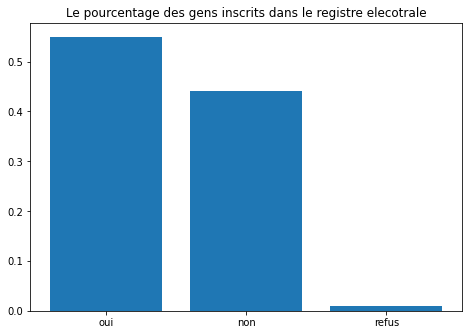

In [ ]:
x=["oui","non","refus"]
y=[Base[Base["Q12"]==1]["Poids"].sum(),Base[Base["Q12"]==2]["Poids"].sum(),Base[Base["Q12"]==98]["Poids"].sum()]
y=y/sum(y)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
plt.title("Le pourcentage des gens inscrits dans le registre elecotrale")
plt.show()

ISIE a annoncé qu'il y'avait 5,370 millions inscrits dans le registre éléctoral et estime qu'il y'avait 3,489 millions élécteurs potentiels. Ce qui nous donne une probabilté de 0.606. 
Le lien de la source est le suivant: https://www.webmanagercenter.com/2019/04/08/433426/isie-5370-millions-de-tunisiens-inscrits-au-registre-electoral/

### Le pourcentage des gens qui manifestent un interet pour pour la politique

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
set(Base["Q17"])

{1, 2, 3, 4, 99}

In [ ]:
nb_total=Base[~Base['Q17'].isin([99])]["Poids"].sum()
p=Base[Base["Q17"].isin([1,2])]["Poids"].sum()/nb_total
f=nb_total/11960000
var=(1-f)*p*(1-p)/(nb_total-1)
print("le pourcentage des pesonnes qui manifestent un interet pour la politique est de l'ordre de {}. La variance de l'estimateur est {}".format(p,var))

le pourcentage des pesonnes qui manifestent un interet pour la politique est de l'ordre de 0.4440356971576023. La variance de l'estimateur est 1.091116844154646e-08


le pourcentage des pesonnes qui manifestent un interet pour la politique est de l'ordre de 48.3% . La variance de l'estimateur est 2.2755666098219552e-05. Ainsi, on presque sur qu'on est proche de la vrai valeur

###Le pourcentage des gens qui sont très intéréssés par la politique

In [ ]:
nb_total=Base[~Base['Q17'].isin([99])]["Poids"].sum()
p=Base[Base["Q17"].isin([1])]["Poids"].sum()/nb_total
f=nb_total/11960000
var=(1-f)*p*(1-p)/(nb_total-1)
print("le pourcentage des pesonnes qui manifestent un interet pour la politique est de l'ordre de {}. La variance de l'estimateur est {}".format(p,var))

le pourcentage des pesonnes qui manifestent un interet pour la politique est de l'ordre de 0.11332753716363188. La variance de l'estimateur est 4.44124916585246e-09


Ici, seulement 11,3% des tunisiens sont très intéressés par la politique (La variance est de l'ordere de 1.0055019385198964e-05)

### Quelle est la catégorie d'age qui manifeste un intéret pour la politique

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")

In [ ]:
Base["groupe d'age"]= pd.cut(Base.Q5,bins=[0,25,35,45,55,65,100])
groupes_ages=set(Base["groupe d'age"])
groupes_ages = list(groupes_ages)
couples={}
for i in groupes_ages:
  nb_total=Base[(~Base['Q17'].isin([99]))&(Base["groupe d'age"]==i)]["Poids"].sum()
  p=Base[(Base["Q17"].isin([1,2]))&(Base["groupe d'age"]==i)]["Poids"].sum()/nb_total
  f=nb_total/11960000
  var=(1-f)*p*(1-p)/(nb_total-1)
  couples[i]=[p,var]
df=pd.DataFrame(couples)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


,"(65.0, 100.0]",NaN,"(55.0, 65.0]","(35.0, 45.0]","(0.0, 25.0]","(25.0, 35.0]","(45.0, 55.0]"
0,5.110503e-01,NaN,5.173133e-01,4.950437e-01,3.037895e-01,3.917295e-01,5.210175e-01
1,3.677994e-07,NaN,2.285196e-07,1.373878e-07,1.299154e-07,1.163326e-07,1.693186e-07


On remarque que l'interet à la politque augmente avec l'age des tunisiens. Cela est cohérent avec la réalité. Par exemple la politique est souvent discutées par les personnes agées de plus de 40 ans. 

###Interet par la politque en fonction du status professionnel 

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
Dict={1:"Actif/je travaille",2:"Chômeur",3:"Etudiant",4:"retraité",5:"Femme au foyer",6:"Handicapé",7:"Autres",96:"Refus",98:"Refus",99:"Refus"}
varc='Q9'
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[copy[varc].isin(["Actif/je travaille","Chômeur","Etudiant","retraité","Femme au foyer","Handicapé"])]
df=pd.DataFrame(columns=["statut","interet pour la politiue"])
statut_prof=["Actif/je travaille","Chômeur","Etudiant","retraité","Femme au foyer","Handicapé"]
for i in statut_prof:
  total=copy[copy[varc]==i]["Poids"].sum()
  n=copy[(copy[varc]==i)&((copy["Q17"].isin([1,2])))]["Poids"].sum()
  df=df.append({"statut":i,"interet pour la politiue":n/total},ignore_index=True)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


,statut,interet pour la politiue
0,Actif/je travaille,0.371107
1,Chômeur,0.365557
2,Etudiant,0.576695
3,retraité,0.445171
4,Femme au foyer,0.473946
5,Handicapé,NaN


D'après les résultats, on voit bien que les gens les moins intéressés par la  politque sont les chomeurs et les personnes actifs.
Cependant les étudiants qui appartiennent à la génération de la révolution sont les personnes les plus intéressés par la politique. 

In [ ]:
Base[Base["Q17"].isin([1])].count()[0]/Base.count()[0]

In [ ]:
Base.count()[0]

In [ ]:
f=11000/11960000
var=(1-f)*p*(1-p)/10999
var

### Le candidat préféré pour chaque groupe d'age

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
Base["groupe d'age"]= pd.cut(Base.Q5,bins=[0,25,35,45,55,65,100])
copy = Base.copy()
varc='Q20'
Dict={1:"Beji Caïd Essebsi",2:"Moncef Marzouki",3:"Mehdi Jomaa",4:"Rached Ghannouchi",5:"Samia Abbou",6:"Mohammed Abbou",7:"Hamma Hammani",8:"Youssef Chahed",9:"Kamel Morjan",
      10:"Mohsen Marzouk",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Ne sait pas","Ne connait pas","refus"])]
df=pd.DataFrame()
copy=copy.groupby(["groupe d'age",varc]).agg({"Poids":"sum"}).reset_index()
df=pd.DataFrame(columns=["groupe d'age","Q20","Poids"])
age_groupe=set(copy["groupe d'age"])
for i in age_groupe:
  tmp=copy.loc[copy["groupe d'age"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["Poids"].idxmax()])
df

,groupe d'age,Q20,Poids,index
11,"(65, 100]",Youssef Chahed,76523.244405,71.0
11,"(55, 65]",Youssef Chahed,146079.909868,59.0
11,"(35, 45]",Youssef Chahed,221306.156665,35.0
11,"(0, 25]",Youssef Chahed,231062.522751,11.0
8,"(25, 35]",Moncef Marzouki,248485.225102,20.0
11,"(45, 55]",Youssef Chahed,180564.062190,47.0


In [ ]:
copy = Base.copy()
varc='Q20'
Dict={1:"Beji Caïd Essebsi",2:"Moncef Marzouki",3:"Mehdi Jomaa",4:"Rached Ghannouchi",5:"Samia Abbou",6:"Mohammed Abbou",7:"Hamma Hammani",8:"Youssef Chahed",9:"Kamel Morjan",
      10:"Mohsen Marzouk",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Ne sait pas","Ne connait pas","refus"])]
df=pd.DataFrame()
copy=copy.groupby(["groupe d'age",varc]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["groupe d'age","Q20","ID"])
age_groupe=set(copy["groupe d'age"])
for i in age_groupe:
  tmp=copy.loc[copy["groupe d'age"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df=df[["groupe d'age","Q20","ID"]]
df

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
Base["groupe d'age"]= pd.cut(Base.Q5,bins=[0,25,60,100])
copy = Base.copy()
varc='Q20'
Dict={1:"Beji Caïd Essebsi",2:"Moncef Marzouki",3:"Mehdi Jomaa",4:"Rached Ghannouchi",5:"Samia Abbou",6:"Mohammed Abbou",7:"Hamma Hammani",8:"Youssef Chahed",9:"Kamel Morjan",
      10:"Mohsen Marzouk",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Ne sait pas","Ne connait pas","refus"])]
df=pd.DataFrame()
copy=copy.groupby(["groupe d'age",varc]).agg({"Poids":"sum"}).reset_index()
df=pd.DataFrame(columns=["groupe d'age","Q20","Poids"])
age_groupe=set(copy["groupe d'age"])
for i in age_groupe:
  tmp=copy.loc[copy["groupe d'age"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["Poids"].idxmax()])
df

,groupe d'age,Q20,Poids,index
11,"(25, 60]",Youssef Chahed,725917.033472,23.0
11,"(0, 25]",Youssef Chahed,231062.522751,11.0
11,"(60, 100]",Youssef Chahed,141551.262506,35.0


Ici on remarque que Youssef Chahed est le candidat préféré par la population tunisienne

### Candidat préferé par sexe

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
varc='Q20'
Dict={1:"Beji Caïd Essebsi",2:"Moncef Marzouki",3:"Mehdi Jomaa",4:"Rached Ghannouchi",5:"Samia Abbou",6:"Mohammed Abbou",7:"Hamma Hammani",8:"Youssef Chahed",9:"Kamel Morjan",
      10:"Mohsen Marzouk",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Ne sait pas","Ne connait pas","refus"])]
df=pd.DataFrame()
copy=copy.groupby(["Q1",varc]).agg({"Poids":"sum"}).reset_index()
df=pd.DataFrame(columns=["Q1","Q20","Poids"])
sexe=set(copy["Q1"])
for i in sexe:
  tmp=copy.loc[copy["Q1"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["Poids"].idxmax()])
df=df[["Q1","Q20","Poids"]]
df

,Q1,Q20,Poids
11,1,Youssef Chahed,559770.404819
11,2,Youssef Chahed,543344.369574


###Le candidat préférée par statut professionnel

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
varc='Q20'
Dict={1:"Beji Caïd Essebsi",2:"Moncef Marzouki",3:"Mehdi Jomaa",4:"Rached Ghannouchi",5:"Samia Abbou",6:"Mohammed Abbou",7:"Hamma Hammani",8:"Youssef Chahed",9:"Kamel Morjan",
      10:"Mohsen Marzouk",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
Dict={1:"Actif/je travaille",2:"Chômeur",3:"Etudiant",4:"retraité",5:"Femme au foyer",6:"Handicapé",7:"Autres",96:"Refus",98:"Refus",99:"Refus"}
varc='Q9'
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Refus de répondre"])]
df=pd.DataFrame()
varc="Q20"
copy=copy[~copy[varc].isin(["Ne sait pas","Ne connait pas","refus"])]
copy=copy.groupby(["Q9",varc]).agg({"Poids":"sum"}).reset_index()
df=pd.DataFrame(columns=["Q6","Q20","Pods"])
activite=set(copy["Q9"])
for i in activite:
  tmp=copy.loc[copy["Q9"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["Poids"].idxmax()])
df=df[["Q9","Q20","Poids"]]
df

,Q9,Q20,Poids
11,Etudiant,Youssef Chahed,73575.832696
2,Refus,Mohsen Marzouk,952.058379
11,retraité,Youssef Chahed,347643.099003
11,Chômeur,Youssef Chahed,83607.687844
11,Actif/je travaille,Youssef Chahed,224461.363639
11,Femme au foyer,Youssef Chahed,11169.141704


###Le pourcentage des individus qui connaissent à la fois le président, le 1er ministre et le secrétaire général actuel de l’UGTT 

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
total=copy[(~copy['Q14'].isin([99]))&(~copy['Q15'].isin([99]))&(~copy['Q16'].isin([99]))]["Poids"].sum()
n=copy[(copy['Q14'].isin([1]))&(copy['Q15'].isin([1]))&(copy['Q16'].isin([1]))]["Poids"].sum() 
print("total:{}, réponse correcte:{}, pourcentage:{}".format(total,n,n/total))

total:7829355.256281689, réponse correcte:3122314.2148869853, pourcentage:0.3987958283514947


Seulement 39% de la population de la tunisie connaissent les personnent qui dirigent le pays. Ce chiffre est très proche de la valeur estimé des personnes intéressés par la politique. A mon avis, cette valeur est plus fiable puisque le fait de répondre à ces trois est un vrai test de validation des connaissances.

###Partie politique préférée par les tunisiens 

refus                   3028
Ne sait pas             2239
Ennahda                 1227
Autres                   989
Nidaa Tounes             879
Abstention               752
Front Populaire          558
Courant Démocratique     270
Ne connait pas           236
Afek Tounes              188
Courant de l'Amour       149
Machrou Tounes           135
UPL                       96
Voterait blanc            95
Al Joumhouri              82
Irada                     49
Albadil                   28
Name: Q19, dtype: int64


Text(0.5, 1.0, 'Q19')

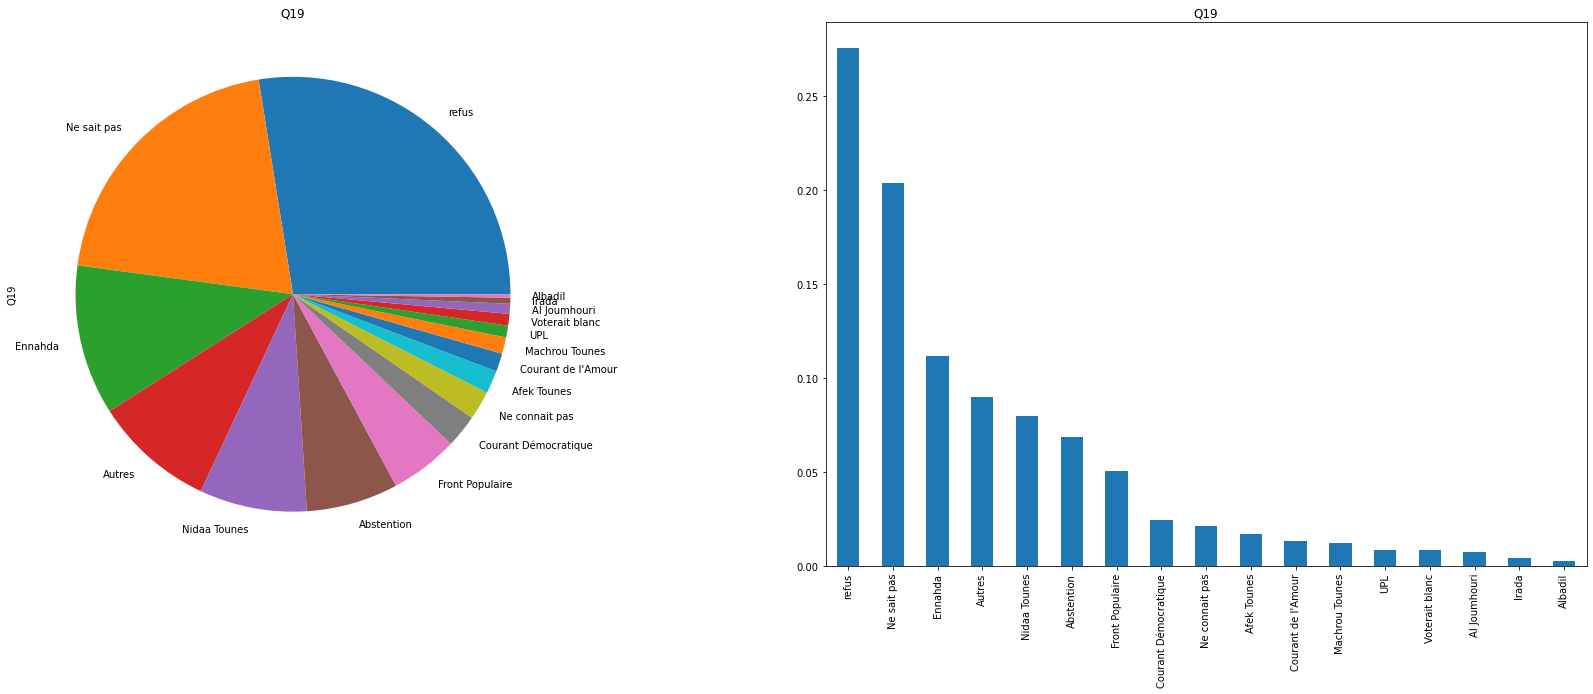

In [ ]:
copy = Base.copy()
varc='Q19'
Dict={1:"Nidaa Tounes",2:"Ennahda",3:"Front Populaire",4:"UPL",5:"Afek Tounes",6:"Al Joumhouri",7:"Machrou Tounes",8:"Irada",9:"Courant Démocratique",
      10:"Courant de l'Amour",11:"Albadil",12:"Autres",95:"Voterait blanc",96:"Abstention",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
#Apercu générale sur la variable
print(copy[varc].value_counts())

plt.figure(figsize=(30,10))

#Distribution de la variable
plt.subplot(1,2,1)
copy[varc].value_counts(normalize=True).plot(kind='pie')
plt.title(varc)

#Distribution de la variable  
plt.subplot(1,2,2)
copy[varc].value_counts(normalize=True).plot(kind='bar')
plt.title(varc)

###Partie politique préférée par sexe

In [ ]:
set(Base["Q19"].values)

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
varc='Q19'
Dict={1:"Nidaa Tounes",2:"Ennahda",3:"Front Populaire",4:"UPL",5:"Afek Tounes",6:"Al Joumhouri",7:"Machrou Tounes",8:"Irada",9:"Courant Démocratique",
      10:"Courant de l'Amour",11:"Albadil",12:"Autres",95:"Voterait blanc",96:"Abstention",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Ne sait pas","Ne connait pas","refus"])]
df=pd.DataFrame()
copy=copy.groupby(["Q1",varc]).agg({"Poids":"sum"}).reset_index()
df=pd.DataFrame(columns=["Q1","Q19","Poids"])
sexe=set(copy["Q1"])
for i in sexe:
  tmp=copy.loc[copy["Q1"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["Poids"].idxmax()])
df=df[["Q1","Q19","Poids"]]
df

,Q1,Q19,Poids
7,1,Ennahda,487637.860656
7,2,Ennahda,391175.155090


###Partie politique préféré par région

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
Dict={1:"Tunis",2:"Ariana",3:"Ben arous",4:"Mannouba",7:"Nabeul",26:"Nabeul",6:"Bizerte",5:"Zaghouane",8:"Beja",10:"El kef",9:"Jandouba",
      11:"Seliana",15:"Sousse",16:"Monastir",17:"Mehdia",25:"Tunis",18:"Sfax",27:"Sfax",12:"Kairouan",14:"Sidi bouzid",13:"Kasserine",19:"Gabes",
      20:"Mednine",24:"Tataouine",21:"Gafsa",22:"Tozeur",23:"Kebeli"}
varc='Q2'
copy.replace(to_replace={varc: Dict},inplace=True)
varc='Q19'
Dict={1:"Nidaa Tounes",2:"Ennahda",3:"Front Populaire",4:"UPL",5:"Afek Tounes",6:"Al Joumhouri",7:"Machrou Tounes",8:"Irada",9:"Courant Démocratique",
      10:"Courant de l'Amour",11:"Albadil",12:"Autres",95:"Voterait blanc",96:"Abstention",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Ne sait pas","Ne connait pas","refus"])]
copy=copy.groupby(["Q2","Q19"]).agg({"Poids":"sum"}).reset_index()
df=pd.DataFrame(columns=["Q2","Q19","Poids"])
partie=set(copy["Q2"])
for i in partie:
  tmp=copy.loc[copy["Q2"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["Poids"].idxmax()])
df[["Q2","Q19","Poids"]].reset_index()

,index,Q2,Q19,Poids
0,7,Gabes,Ennahda,44729.402848
1,7,El kef,Ennahda,19195.376847
2,6,Kasserine,Ennahda,32277.835526
3,7,Tozeur,Ennahda,8316.175423
4,4,Ariana,Autres,57139.894843
5,6,Kebeli,Ennahda,19163.845980
6,3,Zaghouane,Autres,17722.935991
7,4,Tunis,Autres,95153.545245
8,7,Gafsa,Ennahda,38505.519698
9,3,Beja,Autres,27497.882860


On remarque que les villes sur les cotes ont tendance à ne pas voter pour Ennahda. Alors que la majorité des autres villes choississent cette partie politique qui est très répandues chez les habitants de ces régions. Celui-ci est un refelt des différences des mentalités des gens puisque Ennahda représente le courant convervateur.  

###Candidat préferé par région

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
Dict={1:"Tunis",2:"Ariana",3:"Ben arous",4:"Mannouba",7:"Nabeul",26:"Nabeul",6:"Bizerte",5:"Zaghouane",8:"Beja",10:"El kef",9:"Jandouba",
      11:"Seliana",15:"Sousse",16:"Monastir",17:"Mehdia",25:"Tunis",18:"Sfax",27:"Sfax",12:"Kairouan",14:"Sidi bouzid",13:"Kasserine",19:"Gabes",
      20:"Mednine",24:"Tataouine",21:"Gafsa",22:"Tozeur",23:"Kebeli"}
varc='Q2'
copy.replace(to_replace={varc: Dict},inplace=True)
varc='Q20'
Dict={1:"Beji Caïd Essebsi",2:"Moncef Marzouki",3:"Mehdi Jomaa",4:"Rached Ghannouchi",5:"Samia Abbou",6:"Mohammed Abbou",7:"Hamma Hammani",8:"Youssef Chahed",9:"Kamel Morjan",
      10:"Mohsen Marzouk",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Ne sait pas","Ne connait pas","refus"])]
copy=copy.groupby(["Q2","Q20"]).agg({"Poids":"sum"}).reset_index()
df=pd.DataFrame(columns=["Q2","Q20","sum"])
partie=set(copy["Q2"])
for i in partie:
  tmp=copy.loc[copy["Q2"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["Poids"].idxmax()])
df[["Q2","Q20","Poids"]].reset_index()

,index,Q2,Q20,Poids
0,8,Gabes,Moncef Marzouki,69608.889015
1,3,El kef,Hamma Hammani,25070.176798
2,8,Kasserine,Moncef Marzouki,36787.771809
3,8,Tozeur,Moncef Marzouki,15153.821082
4,11,Ariana,Youssef Chahed,77745.315481
5,7,Kebeli,Moncef Marzouki,48654.700381
6,11,Zaghouane,Youssef Chahed,29465.237372
7,11,Tunis,Youssef Chahed,126817.440881
8,7,Gafsa,Moncef Marzouki,37288.801231
9,11,Beja,Youssef Chahed,38944.321141


On note pour Sousse et Mehdia une tendance à voter pour le candidat qui est né dans ces villes à savoir Kamel Morjane et Mehdi Jomaa. 
Il est clair que les deux candidats préferés sont Youssef Chahed et ensuite Moncef Marzouki qui vient en deuxième place. 
Le fait que youssef chahed est le favoris vient du fait qu'il etait le premier ministre durant cette période. Donc il avait la meilleure couverture médiatique bien que certains personnes le dénoncent fortement pour des raisons de corruption

###Candidat préferé par Statut professionnel

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
Dict={1:"Actif/je travaille",2:"Chômeur",3:"Etudiant",4:"retraité",5:"Femme au foyer",6:"Handicapé",7:"Autres",96:"Refus",98:"Refus",99:"Refus"}
varc='Q9'
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[copy[varc].isin(["Actif/je travaille","Chômeur","Etudiant","retraité","Femme au foyer","Handicapé"])]
varc='Q20'
Dict={1:"Beji Caïd Essebsi",2:"Moncef Marzouki",3:"Mehdi Jomaa",4:"Rached Ghannouchi",5:"Samia Abbou",6:"Mohammed Abbou",7:"Hamma Hammani",8:"Youssef Chahed",9:"Kamel Morjan",
      10:"Mohsen Marzouk",98:"refus",97:"Ne sait pas",99:"Ne sait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["refus"])]
copy=copy.groupby(["Q9","Q20"]).agg({"Poids":"sum"}).reset_index()
df=pd.DataFrame(columns=["Q9","Q20","Poids"])
partie=set(copy["Q9"])
for i in partie:
  tmp=copy.loc[copy["Q9"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["Poids"].idxmax()])
df[["Q9","Q20","Poids"]].reset_index()

,index,Q9,Q20,Poids
0,12,Etudiant,Youssef Chahed,73575.832696
1,9,retraité,Ne sait pas,377296.711691
2,12,Chômeur,Youssef Chahed,83607.687844
3,9,Actif/je travaille,Ne sait pas,281480.736208
4,9,Femme au foyer,Ne sait pas,15388.229241


On peut dire pour les chomeurs qui'ils ont choisit pour voter à Moncef Marzouki parce que au contraie de Youssef chahed, Moncef Marzouki n'occupait pas de poste politique. Ainsi on peut dire qu'ils cherchent à faire un changment qui pourra améliorer les

###Partie politique par satut professionnel

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
Dict={1:"Actif/je travaille",2:"Chômeur",3:"Etudiant",4:"retraité",5:"Femme au foyer",6:"Handicapé",7:"Autres",96:"Refus",98:"Refus",99:"Refus"}
varc='Q9'
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[copy[varc].isin(["Actif/je travaille","Chômeur","Etudiant","retraité","Femme au foyer","Handicapé"])]
Dict={1:"Nidaa Tounes",2:"Ennahda",3:"Front Populaire",4:"UPL",5:"Afek Tounes",6:"Al Joumhouri",7:"Machrou Tounes",8:"Irada",9:"Courant Démocratique",
      10:"Courant de l'Amour",11:"Albadil",12:"Autres",95:"Voterait blanc",96:"Abstention",98:"refus",97:"Ne sait pas",99:"Ne sait pas"}
varc="Q19"
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[(~copy[varc].isin(["refus"]))]
copy=copy.groupby(["Q9","Q19"]).agg({"Poids":"sum"}).reset_index()
df=pd.DataFrame(columns=["Q9","Q19","Poids"])
partie=set(copy["Q9"])
for i in partie:
  tmp=copy.loc[copy["Q9"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["Poids"].idxmax()])
df[["Q9","Q19","Poids"]].reset_index()

,index,Q9,Q19,Poids
0,11,Etudiant,Ne sait pas,105850.290637
1,11,retraité,Ne sait pas,560256.130626
2,11,Chômeur,Ne sait pas,89282.912739
3,11,Actif/je travaille,Ne sait pas,395700.604988
4,8,Femme au foyer,Ne sait pas,13697.354871


In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
Dict={1:"Actif/je travaille",2:"Chômeur",3:"Etudiant",4:"retraité",5:"Femme au foyer",6:"Handicapé",7:"Autres",96:"Refus",98:"Refus",99:"Refus"}
varc='Q9'
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[copy[varc].isin(["Actif/je travaille","Chômeur","Etudiant","retraité","Femme au foyer","Handicapé"])]
Dict={1:"Nidaa Tounes",2:"Ennahda",3:"Front Populaire",4:"UPL",5:"Afek Tounes",6:"Al Joumhouri",7:"Machrou Tounes",8:"Irada",9:"Courant Démocratique",
      10:"Courant de l'Amour",11:"Albadil",12:"Autres",95:"Voterait blanc",96:"Abstention",98:"refus",97:"Ne sait pas",99:"Ne sait pas"}
varc="Q19"
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[(~copy[varc].isin(["Ne sait pas","refus"]))]
copy=copy.groupby(["Q9","Q19"]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["Q9","Q19","ID"])
partie=set(copy["Q9"])
for i in partie:
  tmp=copy.loc[copy["Q9"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df[["Q9","Q19","ID"]].reset_index()

###Climat social

# **Q28: Parmi les problèmes suivants, lequel correspond le mieux aux préoccupations actuelles  ? Et quel est le deuxième problème qui correspond aux préoccupations actuelles ?** 

La vie coûte trop cher                    4092
Il y a trop de chômage                    2640
On ne peut pas se soigner correctement    1577
Il y a trop d’inégalités sociales          525
-\tIl n’y a pas assez de sécurité          460
Les salaires sont trop bas                 405
Rien de tout cela                          362
Pas de deuxième réponse                    233
Les impôts sont trop élevés                202
Il n’y a rien à faire                      199
Les services publics sont inefficaces      189
refus                                      116
Name: Q28A, dtype: int64


Text(0.5, 1.0, 'Q28A')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


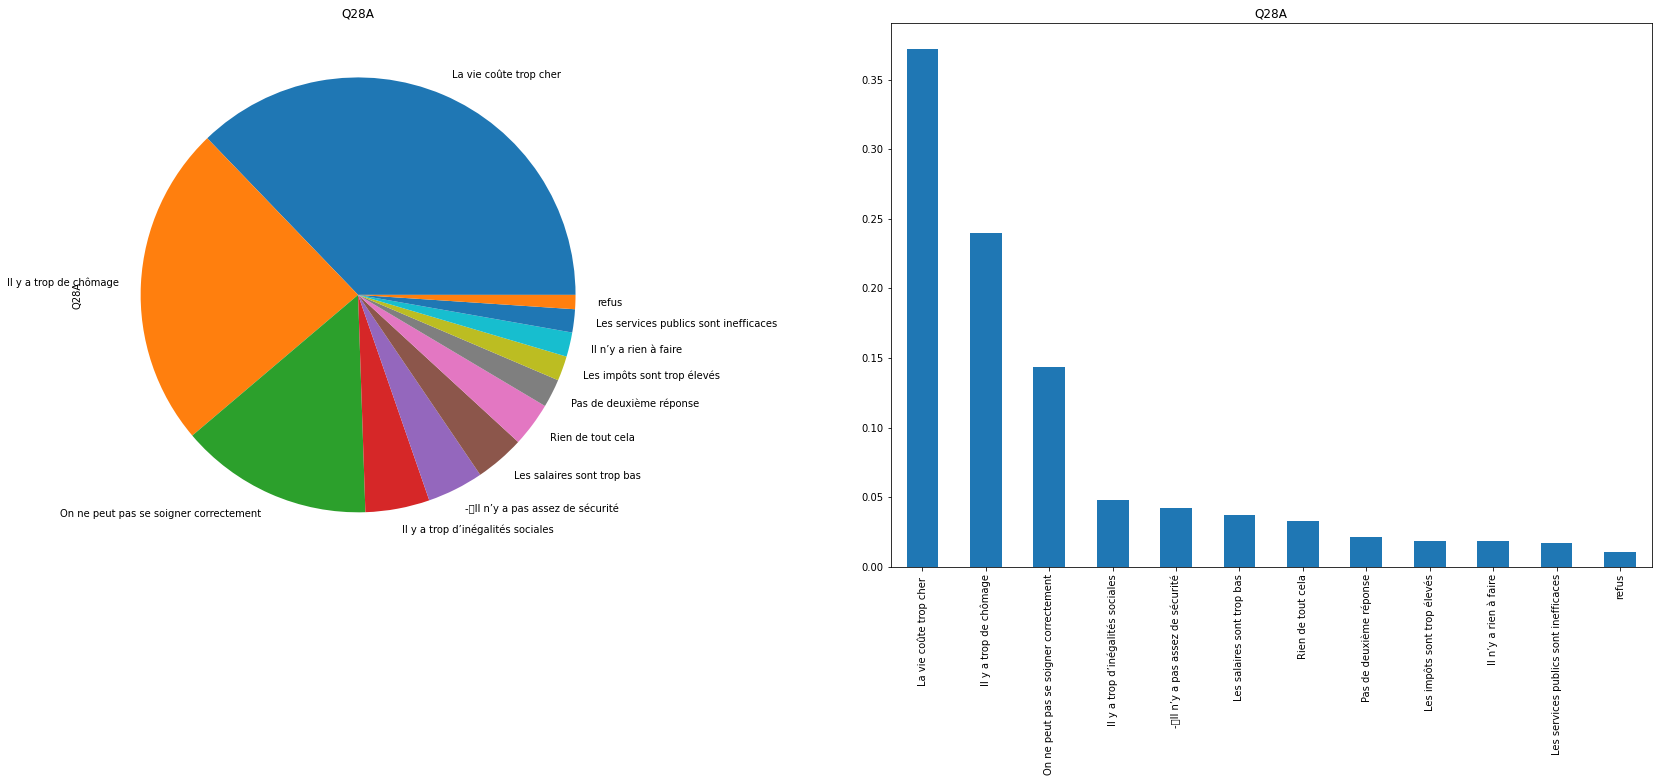

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
varc='Q28A'
Dict={1:"La vie coûte trop cher ",2:"Les impôts sont trop élevés",3:"Il y a trop de chômage",4:"Il y a trop d’inégalités sociales",5:"-	Il n’y a pas assez de sécurité",6:"Les services publics sont inefficaces",7:"Il n’y a rien à faire",8:"Les salaires sont trop bas",9:"On ne peut pas se soigner correctement",
      10:"Rien de tout cela",99:"refus",97:"Pas de deuxième réponse",98:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
#Apercu générale sur la variable
print(copy[varc].value_counts())

plt.figure(figsize=(30,10))

#Distribution de la variable
plt.subplot(1,2,1)
copy[varc].value_counts(normalize=True).plot(kind='pie')
plt.title(varc)

#Distribution de la variable  
plt.subplot(1,2,2)
copy[varc].value_counts(normalize=True).plot(kind='bar')
plt.title(varc)

La vie coûte trop cher                    2970
Il y a trop de chômage                    2486
On ne peut pas se soigner correctement    1011
Rien de tout cela                          660
Les salaires sont trop bas                 627
Il y a trop d’inégalités sociales          588
-\tIl n’y a pas assez de sécurité          576
Ne connait pas                             539
Les impôts sont trop élevés                397
Les services publics sont inefficaces      304
Pas de deuxième réponse                    290
Il n’y a rien à faire                      197
refus                                        6
Name: Q28B, dtype: int64


Text(0.5, 1.0, 'Q28B')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


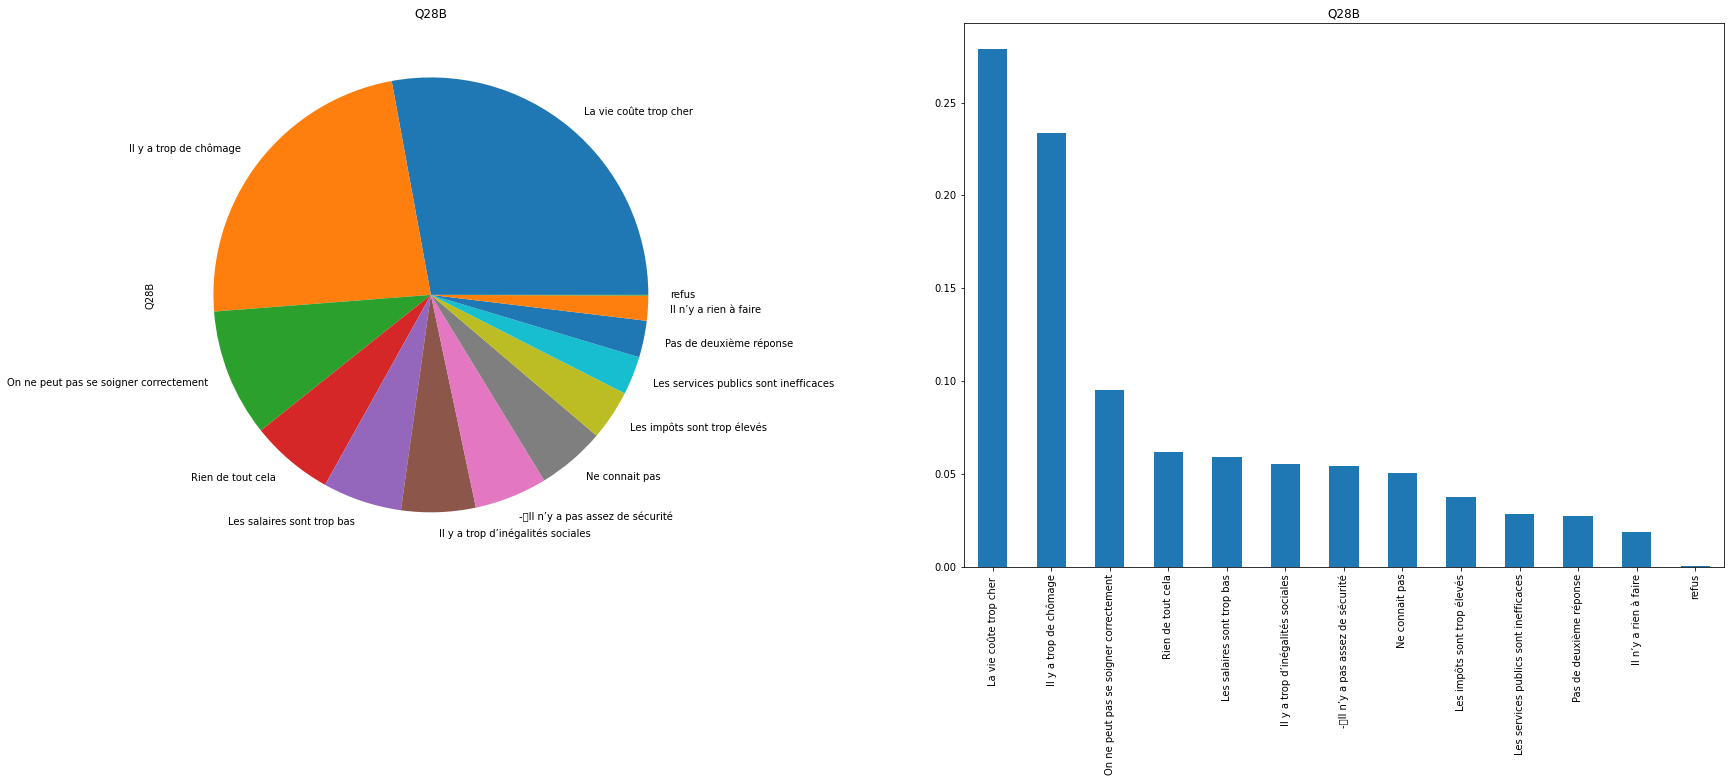

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
varc='Q28B'
Dict={1:"La vie coûte trop cher ",2:"Les impôts sont trop élevés",3:"Il y a trop de chômage",4:"Il y a trop d’inégalités sociales",5:"-	Il n’y a pas assez de sécurité",6:"Les services publics sont inefficaces",7:"Il n’y a rien à faire",8:"Les salaires sont trop bas",9:"On ne peut pas se soigner correctement",
      10:"Rien de tout cela",99:"refus",97:"Pas de deuxième réponse",98:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
#Apercu générale sur la variable
print(copy[varc].value_counts())

plt.figure(figsize=(30,10))

#Distribution de la variable
plt.subplot(1,2,1)
copy[varc].value_counts(normalize=True).plot(kind='pie')
plt.title(varc)

#Distribution de la variable  
plt.subplot(1,2,2)
copy[varc].value_counts(normalize=True).plot(kind='bar')
plt.title(varc)

les premières préoccupations des personnes selon chaque tranche d'age


---



In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
Base["groupe d'age"]= pd.cut(Base.Q5,bins=[0,25,35,45,55,65,100])
copy = Base.copy()
varc='Q28A'
Dict={1:"La vie coûte trop cher ",2:"Les impôts sont trop élevés",3:"Il y a trop de chômage",4:"Il y a trop d’inégalités sociales",5:"-	Il n’y a pas assez de sécurité",6:"Les services publics sont inefficaces",7:"Il n’y a rien à faire",8:"Les salaires sont trop bas",9:"On ne peut pas se soigner correctement",
      10:"Rien de tout cela",99:"refus",97:"Pas de deuxième réponse",98:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Pas de deuxième réponse","Ne connait pas","refus"])]
df=pd.DataFrame()
copy=copy.groupby(["groupe d'age",varc]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["groupe d'age","Q28A","ID"])
age_groupe=set(copy["groupe d'age"])
for i in age_groupe:
  tmp=copy.loc[copy["groupe d'age"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df

,groupe d'age,Q28A,ID,index
4,"(45, 55]",La vie coûte trop cher,740,34.0
4,"(35, 45]",La vie coûte trop cher,1143,24.0
4,"(25, 35]",La vie coûte trop cher,822,14.0
4,"(65, 100]",La vie coûte trop cher,373,54.0
4,"(55, 65]",La vie coûte trop cher,536,44.0
2,"(0, 25]",Il y a trop de chômage,488,2.0


les deuxièmes préoccupations des personnes selon la tranche d'age

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
Base["groupe d'age"]= pd.cut(Base.Q5,bins=[0,25,35,45,55,65,100])
copy = Base.copy()
varc='Q28B'
Dict={1:"La vie coûte trop cher ",2:"Les impôts sont trop élevés",3:"Il y a trop de chômage",4:"Il y a trop d’inégalités sociales",5:"-	Il n’y a pas assez de sécurité",6:"Les services publics sont inefficaces",7:"Il n’y a rien à faire",8:"Les salaires sont trop bas",9:"On ne peut pas se soigner correctement",
      10:"Rien de tout cela",99:"refus",97:"Pas de deuxième réponse",98:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Pas de deuxième réponse","Ne connait pas","refus"])]
df=pd.DataFrame()
copy=copy.groupby(["groupe d'age",varc]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["groupe d'age","Q28B","ID"])
age_groupe=set(copy["groupe d'age"])
for i in age_groupe:
  tmp=copy.loc[copy["groupe d'age"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df

,groupe d'age,Q28B,ID,index
4,"(45, 55]",La vie coûte trop cher,597,34.0
4,"(35, 45]",La vie coûte trop cher,683,24.0
4,"(25, 35]",La vie coûte trop cher,623,14.0
4,"(65, 100]",La vie coûte trop cher,238,54.0
4,"(55, 65]",La vie coûte trop cher,417,44.0
2,"(0, 25]",Il y a trop de chômage,399,2.0


préoccupations des personnes selon le sexe

In [ ]:
set(Base["Q28A"].values)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 97, 99}

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
varc='Q28A'
Dict={1:"La vie coûte trop cher ",2:"Les impôts sont trop élevés",3:"Il y a trop de chômage",4:"Il y a trop d’inégalités sociales",5:"-	Il n’y a pas assez de sécurité",6:"Les services publics sont inefficaces",7:"Il n’y a rien à faire",8:"Les salaires sont trop bas",9:"On ne peut pas se soigner correctement",
      10:"Rien de tout cela",99:"refus",97:"Pas de deuxième réponse",98:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Pas de deuxième réponse","Ne connait pas","refus"])]
df=pd.DataFrame()
copy=copy.groupby(["Q1",varc]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["Q1","Q28A","ID"])
sexe=set(copy["Q1"])
for i in sexe:
  tmp=copy.loc[copy["Q1"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df=df[["Q1","Q28A","ID"]]
df

,Q1,Q28A,ID
4,1,La vie coûte trop cher,1694
4,2,La vie coûte trop cher,2398


Préoccupations des personnes selon la région

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
Dict={1:"Tunis",2:"Ariana",3:"Ben arous",4:"Mannouba",7:"Nabeul",26:"Nabeul",6:"Bizerte",5:"Zaghouane",8:"Beja",10:"El kef",9:"Jandouba",
      11:"Seliana",15:"Sousse",16:"Monastir",17:"Mehdia",25:"Tunis",18:"Sfax",27:"Sfax",12:"Kairouan",14:"Sidi bouzid",13:"Kasserine",19:"Gabes",
      20:"Mednine",24:"Tataouine",21:"Gafsa",22:"Tozeur",23:"Kebeli"}
varc='Q2'
copy.replace(to_replace={varc: Dict},inplace=True)
varc='Q28A'
Dict={1:"La vie coûte trop cher ",2:"Les impôts sont trop élevés",3:"Il y a trop de chômage",4:"Il y a trop d’inégalités sociales",5:"-	Il n’y a pas assez de sécurité",6:"Les services publics sont inefficaces",7:"Il n’y a rien à faire",8:"Les salaires sont trop bas",9:"On ne peut pas se soigner correctement",
      10:"Rien de tout cela",99:"refus",97:"Pas de deuxième réponse",98:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Pas de deuxième réponse","Ne connait pas","refus"])]
copy=copy.groupby(["Q2","Q28A"]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["Q2","Q28A","ID"])
partie=set(copy["Q2"])
for i in partie:
  tmp=copy.loc[copy["Q2"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df[["Q2","Q28A","ID"]].reset_index()

,index,Q2,Q28A,ID
0,4,Tunis,La vie coûte trop cher,328
1,4,Sidi bouzid,La vie coûte trop cher,148
2,2,Jandouba,Il y a trop de chômage,143
3,4,Ben arous,La vie coûte trop cher,139
4,4,Zaghouane,La vie coûte trop cher,171
5,4,Kasserine,La vie coûte trop cher,148
6,4,Mannouba,La vie coûte trop cher,139
7,4,Monastir,La vie coûte trop cher,134
8,4,Mehdia,La vie coûte trop cher,162
9,4,Beja,La vie coûte trop cher,143


In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
Dict={1:"Tunis",2:"Ariana",3:"Ben arous",4:"Mannouba",7:"Nabeul",26:"Nabeul",6:"Bizerte",5:"Zaghouane",8:"Beja",10:"El kef",9:"Jandouba",
      11:"Seliana",15:"Sousse",16:"Monastir",17:"Mehdia",25:"Tunis",18:"Sfax",27:"Sfax",12:"Kairouan",14:"Sidi bouzid",13:"Kasserine",19:"Gabes",
      20:"Mednine",24:"Tataouine",21:"Gafsa",22:"Tozeur",23:"Kebeli"}
varc='Q2'
copy.replace(to_replace={varc: Dict},inplace=True)
varc='Q28B'
Dict={1:"La vie coûte trop cher ",2:"Les impôts sont trop élevés",3:"Il y a trop de chômage",4:"Il y a trop d’inégalités sociales",5:"-	Il n’y a pas assez de sécurité",6:"Les services publics sont inefficaces",7:"Il n’y a rien à faire",8:"Les salaires sont trop bas",9:"On ne peut pas se soigner correctement",
      10:"Rien de tout cela",99:"refus",97:"Pas de deuxième réponse",98:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Pas de deuxième réponse","Ne connait pas","refus"])]
copy=copy.groupby(["Q2","Q28B"]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["Q2","Q28B","ID"])
partie=set(copy["Q2"])
for i in partie:
  tmp=copy.loc[copy["Q2"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df[["Q2","Q28B","ID"]].reset_index()

,index,Q2,Q28B,ID
0,4,Tunis,La vie coûte trop cher,195
1,2,Sidi bouzid,Il y a trop de chômage,103
2,4,Jandouba,La vie coûte trop cher,132
3,4,Ben arous,La vie coûte trop cher,94
4,4,Zaghouane,La vie coûte trop cher,118
5,4,Kasserine,La vie coûte trop cher,122
6,4,Mannouba,La vie coûte trop cher,103
7,4,Monastir,La vie coûte trop cher,107
8,4,Mehdia,La vie coûte trop cher,110
9,4,Beja,La vie coûte trop cher,111


Préoccupations par statut professionnel

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
Dict={1:"Actif/je travaille",2:"Chômeur",3:"Etudiant",4:"retraité",5:"Femme au foyer",6:"Handicapé",7:"Autres",96:"Refus",98:"Refus",99:"Refus"}
varc='Q9'
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[copy[varc].isin(["Actif/je travaille","Chômeur","Etudiant","retraité","Femme au foyer","Handicapé"])]
varc='Q28A'
Dict={1:"La vie coûte trop cher ",2:"Les impôts sont trop élevés",3:"Il y a trop de chômage",4:"Il y a trop d’inégalités sociales",5:"-	Il n’y a pas assez de sécurité",6:"Les services publics sont inefficaces",7:"Il n’y a rien à faire",8:"Les salaires sont trop bas",9:"On ne peut pas se soigner correctement",
      10:"Rien de tout cela",99:"refus",97:"Pas de deuxième réponse",98:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Pas de deuxième réponse","Ne connait pas","refus"])]
copy=copy.groupby(["Q9","Q28A"]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["Q9","Q28A","ID"])
partie=set(copy["Q9"])
for i in partie:
  tmp=copy.loc[copy["Q9"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df[["Q9","Q28A","ID"]].reset_index()

,index,Q9,Q28A,ID
0,2,Actif/je travaille,Il y a trop de chômage,647
1,4,retraité,La vie coûte trop cher,1717
2,2,Chômeur,Il y a trop de chômage,154
3,4,Etudiant,La vie coûte trop cher,279
4,3,Femme au foyer,La vie coûte trop cher,47


In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
Dict={1:"Actif/je travaille",2:"Chômeur",3:"Etudiant",4:"retraité",5:"Femme au foyer",6:"Handicapé",7:"Autres",96:"Refus",98:"Refus",99:"Refus"}
varc='Q9'
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[copy[varc].isin(["Actif/je travaille","Chômeur","Etudiant","retraité","Femme au foyer","Handicapé"])]
varc='Q28B'
Dict={1:"La vie coûte trop cher ",2:"Les impôts sont trop élevés",3:"Il y a trop de chômage",4:"Il y a trop d’inégalités sociales",5:"-	Il n’y a pas assez de sécurité",6:"Les services publics sont inefficaces",7:"Il n’y a rien à faire",8:"Les salaires sont trop bas",9:"On ne peut pas se soigner correctement",
      10:"Rien de tout cela",99:"refus",97:"Pas de deuxième réponse",98:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Pas de deuxième réponse","Ne connait pas","refus"])]
copy=copy.groupby(["Q9","Q28B"]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["Q9","Q28B","ID"])
partie=set(copy["Q9"])
for i in partie:
  tmp=copy.loc[copy["Q9"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df[["Q9","Q28B","ID"]].reset_index()

,index,Q9,Q28B,ID
0,4,Actif/je travaille,La vie coûte trop cher,546
1,4,retraité,La vie coûte trop cher,1071
2,2,Chômeur,Il y a trop de chômage,144
3,4,Etudiant,La vie coûte trop cher,217
4,4,Femme au foyer,La vie coûte trop cher,30


# ***Q30: Quelle est la vraie division qui existe dans le pays ?***

In [ ]:
set(Base["Q30"].values)

{1, 2, 3, 4, 5, 6, 95, 98, 99}

Division entre les pauvres et les riches                              3862
Division entre la société et la classe politique                      2152
Ne connait pas                                                        1727
Division entre les régions de l'intérieur et les régions côtières     1047
Division entre le nord et le sud du pays                               806
Division entre les conservateurs et les modernistes                    557
Division entre les jeunes et les vieux                                 414
\tPas de division                                                      398
refus                                                                   37
Name: Q30, dtype: int64


Text(0.5, 1.0, 'Q30')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


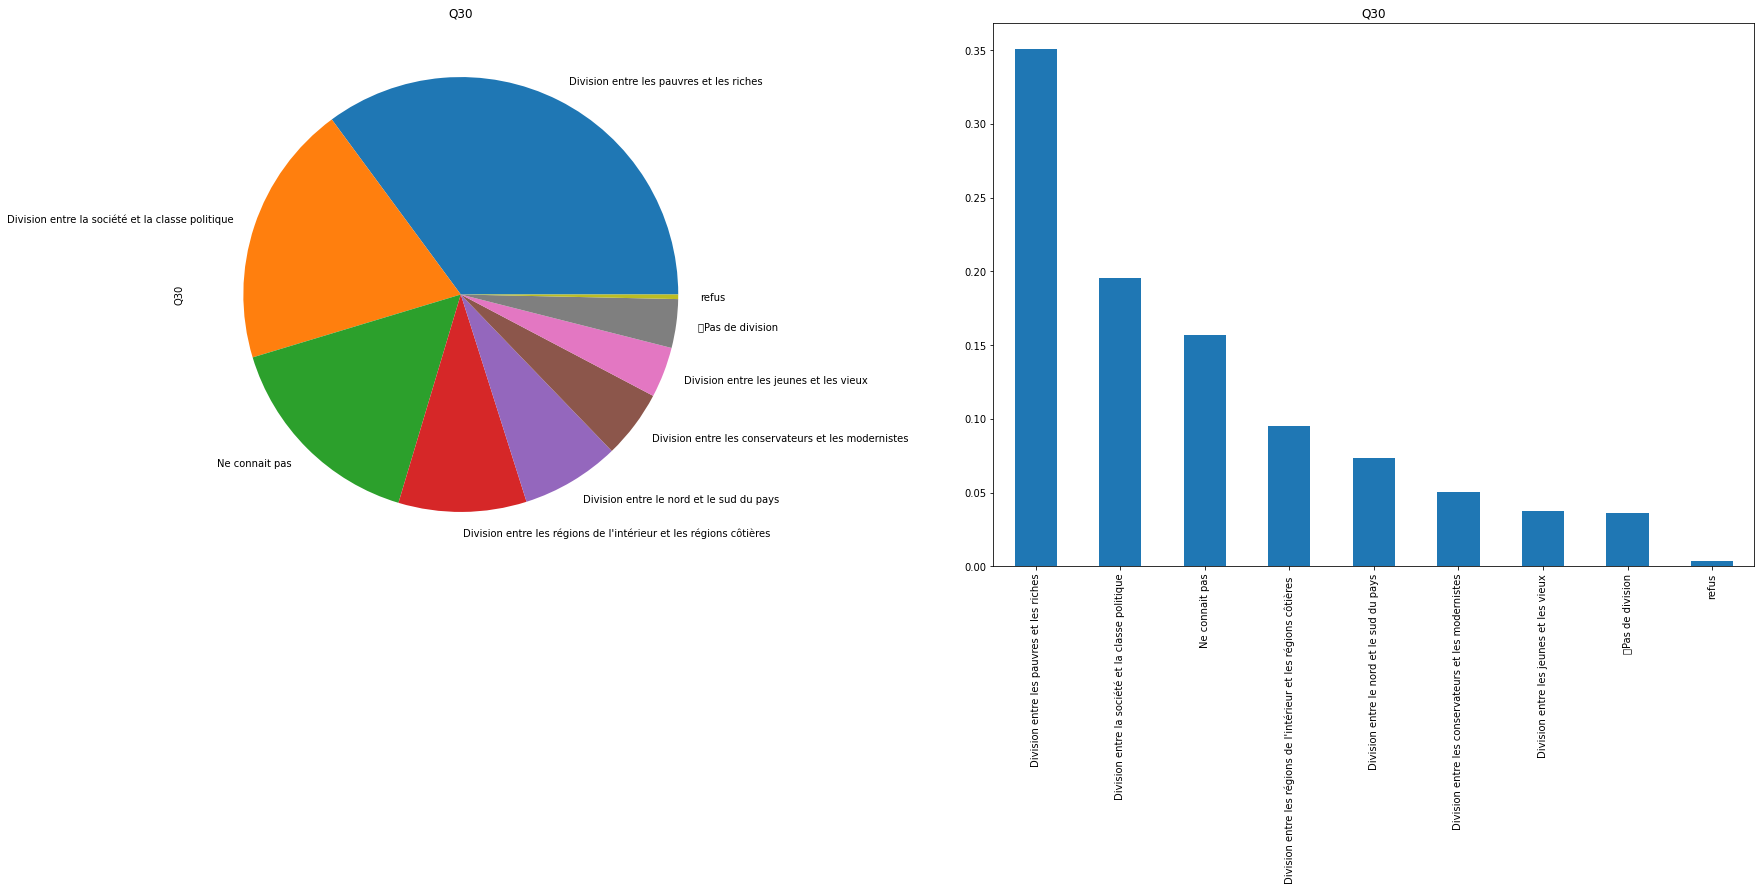

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
varc='Q30'
Dict={1:"Division entre les régions de l'intérieur et les régions côtières ",2:"Division entre le nord et le sud du pays",3:"Division entre les pauvres et les riches",4:"Division entre la société et la classe politique",5:"Division entre les jeunes et les vieux",6:"Division entre les conservateurs et les modernistes",95:"	Pas de division",
      99:"refus",98:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
#Apercu générale sur la variable
print(copy[varc].value_counts())

plt.figure(figsize=(30,10))

#Distribution de la variable
plt.subplot(1,2,1)
copy[varc].value_counts(normalize=True).plot(kind='pie')
plt.title(varc)

#Distribution de la variable  
plt.subplot(1,2,2)
copy[varc].value_counts(normalize=True).plot(kind='bar')
plt.title(varc)

la division existente selon les tranches d'age

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
Base["groupe d'age"]= pd.cut(Base.Q5,bins=[0,25,35,45,55,65,100])
copy = Base.copy()
varc='Q30'
Dict={1:"Division entre les régions de l'intérieur et les régions côtières ",2:"Division entre le nord et le sud du pays",3:"Division entre les pauvres et les riches",4:"Division entre la société et la classe politique",5:"Division entre les jeunes et les vieux",6:"Division entre les conservateurs et les modernistes",95:"	Pas de division",
      99:"refus",98:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Ne connait pas","refus"])]
df=pd.DataFrame()
copy=copy.groupby(["groupe d'age",varc]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["groupe d'age","Q30","ID"])
age_groupe=set(copy["groupe d'age"])
for i in age_groupe:
  tmp=copy.loc[copy["groupe d'age"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df

,groupe d'age,Q30,ID,index
5,"(45, 55]",Division entre les pauvres et les riches,675,26.0
5,"(35, 45]",Division entre les pauvres et les riches,945,19.0
5,"(25, 35]",Division entre les pauvres et les riches,840,12.0
5,"(65, 100]",Division entre les pauvres et les riches,246,40.0
5,"(55, 65]",Division entre les pauvres et les riches,490,33.0
5,"(0, 25]",Division entre les pauvres et les riches,639,5.0


La division existente selon le profil professionnel

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
Dict={1:"Actif/je travaille",2:"Chômeur",3:"Etudiant",4:"retraité",5:"Femme au foyer",6:"Handicapé",7:"Autres",96:"Refus",98:"Refus",99:"Refus"}
varc='Q9'
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[copy[varc].isin(["Actif/je travaille","Chômeur","Etudiant","retraité","Femme au foyer","Handicapé"])]
varc='Q30'
Dict={1:"Division entre les régions de l'intérieur et les régions côtières ",2:"Division entre le nord et le sud du pays",3:"Division entre les pauvres et les riches",4:"Division entre la société et la classe politique",5:"Division entre les jeunes et les vieux",6:"Division entre les conservateurs et les modernistes",95:"	Pas de division",
      99:"refus",98:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Ne connait pas","refus"])]
copy=copy.groupby(["Q9","Q30"]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["Q9","Q30","ID"])
partie=set(copy["Q9"])
for i in partie:
  tmp=copy.loc[copy["Q9"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df[["Q9","Q30","ID"]].reset_index()

,index,Q9,Q30,ID
0,5,Actif/je travaille,Division entre les pauvres et les riches,712
1,5,retraité,Division entre les pauvres et les riches,1407
2,5,Chômeur,Division entre les pauvres et les riches,184
3,5,Etudiant,Division entre les pauvres et les riches,255
4,5,Femme au foyer,Division entre les pauvres et les riches,36


La division existente selon la region

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
Dict={1:"Tunis",2:"Ariana",3:"Ben arous",4:"Mannouba",7:"Nabeul",26:"Nabeul",6:"Bizerte",5:"Zaghouane",8:"Beja",10:"El kef",9:"Jandouba",
      11:"Seliana",15:"Sousse",16:"Monastir",17:"Mehdia",25:"Tunis",18:"Sfax",27:"Sfax",12:"Kairouan",14:"Sidi bouzid",13:"Kasserine",19:"Gabes",
      20:"Mednine",24:"Tataouine",21:"Gafsa",22:"Tozeur",23:"Kebeli"}
varc='Q2'
copy.replace(to_replace={varc: Dict},inplace=True)
varc='Q30'
Dict={1:"Division entre les régions de l'intérieur et les régions côtières ",2:"Division entre le nord et le sud du pays",3:"Division entre les pauvres et les riches",4:"Division entre la société et la classe politique",5:"Division entre les jeunes et les vieux",6:"Division entre les conservateurs et les modernistes",95:"	Pas de division",
      99:"refus",98:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Ne connait pas","refus"])]
copy=copy.groupby(["Q2","Q30"]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["Q2","Q30","ID"])
partie=set(copy["Q2"])
for i in partie:
  tmp=copy.loc[copy["Q2"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df[["Q2","Q30","ID"]].reset_index()

,index,Q2,Q30,ID
0,5,Tunis,Division entre les pauvres et les riches,343
1,5,Sidi bouzid,Division entre les pauvres et les riches,132
2,5,Jandouba,Division entre les pauvres et les riches,136
3,5,Ben arous,Division entre les pauvres et les riches,157
4,5,Zaghouane,Division entre les pauvres et les riches,178
5,5,Kasserine,Division entre les pauvres et les riches,127
6,5,Mannouba,Division entre les pauvres et les riches,154
7,5,Monastir,Division entre les pauvres et les riches,114
8,5,Mehdia,Division entre les pauvres et les riches,143
9,5,Beja,Division entre les pauvres et les riches,148


# ***Coorélation entre les préoccupations actuelles et les choix de parties politiques***

Choix des préoccupations selon la partie politique

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
varc='Q19'
Dict={1:"Nidaa Tounes",2:"Ennahda",3:"Front Populaire",4:"UPL",5:"Afek Tounes",6:"Al Joumhouri",7:"Machrou Tounes",8:"Irada",9:"Courant Démocratique",
      10:"Courant de l`Amour",11:"Albadil",12:"autre",95:"Voterait blanc ou nul",96:"abstension",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)

varc='Q28A'
Dict={1:"La vie coûte trop cher ",2:"Les impôts sont trop élevés",3:"Il y a trop de chômage",4:"Il y a trop d’inégalités sociales",5:"-	Il n’y a pas assez de sécurité",6:"Les services publics sont inefficaces",7:"Il n’y a rien à faire",8:"Les salaires sont trop bas",9:"On ne peut pas se soigner correctement",
      10:"Rien de tout cela",99:"refus",97:"Pas de deuxième réponse",98:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Pas de deuxième réponse","Ne connait pas","refus"])]
copy=copy.groupby(["Q19","Q28A"]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["Q19","Q28A","ID"])
partie=set(copy["Q19"])
for i in partie:
  tmp=copy.loc[copy["Q19"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df[["Q19","Q28A","ID"]].reset_index()

,index,Q19,Q28A,ID
0,4,Afek Tounes,La vie coûte trop cher,75
1,4,abstension,La vie coûte trop cher,229
2,4,Nidaa Tounes,La vie coûte trop cher,363
3,4,Voterait blanc ou nul,La vie coûte trop cher,27
4,5,Albadil,On ne peut pas se soigner correctement,9
5,4,Ennahda,La vie coûte trop cher,443
6,4,refus,La vie coûte trop cher,1248
7,8,Courant Démocratique,On ne peut pas se soigner correctement,93
8,2,Al Joumhouri,Il y a trop de chômage,26
9,4,Courant de l`Amour,La vie coûte trop cher,50


Effet des préoccupations sur le choix de partie

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
varc='Q19'
Dict={1:"Nidaa Tounes",2:"Ennahda",3:"Front Populaire",4:"UPL",5:"Afek Tounes",6:"Al Joumhouri",7:"Machrou Tounes",8:"Irada",9:"Courant Démocratique",
      10:"Courant de l`Amour",11:"Albadil",12:"autre",95:"Voterait blanc ou nul",96:"abstension",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Ne sait pas","Ne connait pas","refus"])]
varc='Q28A'
Dict={1:"La vie coûte trop cher ",2:"Les impôts sont trop élevés",3:"Il y a trop de chômage",4:"Il y a trop d’inégalités sociales",5:"-	Il n’y a pas assez de sécurité",6:"Les services publics sont inefficaces",7:"Il n’y a rien à faire",8:"Les salaires sont trop bas",9:"On ne peut pas se soigner correctement",
      10:"Rien de tout cela",99:"refus",97:"Pas de deuxième réponse",98:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Pas de deuxième réponse","Ne connait pas","refus"])]
copy=copy.groupby(["Q28A","Q19"]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["Q28A","Q19","ID"])
partie=set(copy["Q28A"])
for i in partie:
  tmp=copy.loc[copy["Q28A"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df[["Q28A","Q19","ID"]].reset_index()

,index,Q28A,Q19,ID
0,12,Les services publics sont inefficaces,autre,25
1,4,Rien de tout cela,Ennahda,32
2,11,Les salaires sont trop bas,autre,39
3,5,On ne peut pas se soigner correctement,Ennahda,252
4,12,-\tIl n’y a pas assez de sécurité,abstension,54
5,5,Il y a trop d’inégalités sociales,Ennahda,70
6,3,Les impôts sont trop élevés,Ennahda,26
7,5,Il y a trop de chômage,Ennahda,262
8,5,La vie coûte trop cher,Ennahda,443
9,5,Il n’y a rien à faire,Front Populaire,21


###Les questions de clivages:

L'instauration de l'égalité dans l'héritage entre homme et femme

In [ ]:
Base=pd.concat([pd.read_excel("/content/Base.xlsx"),pd.read_excel("/content/Base2.xlsx")],axis=1)
copy=Base.copy()
total= copy[copy["Q36_28. L’instauration de l’égalité dans l’héritage entre les hommes et les femmes"].isin([1,2,3,4])]["Poids"].sum()
copy["modified"]=copy[copy["Q36_28. L’instauration de l’égalité dans l’héritage entre les hommes et les femmes"].isin([1,2,3,4])]["Q36_28. L’instauration de l’égalité dans l’héritage entre les hommes et les femmes"].apply(lambda x: 1 if x in [1,2] else 2)
poids=copy[copy["modified"]==1]["Poids"].sum()
p=poids/total
print("seulement {} sont pour l'égalité dans l'héritage entre les hommes et les femmes".format(p))

seulement 0.3120117137486124 sont pour l'égalité dans l'héritage entre les hommes et les femmes


L'instauration de l'égalité dans l'héritage entre homme et femme en fonction des régions

In [ ]:
Base=pd.concat([pd.read_excel("/content/Base.xlsx"),pd.read_excel("/content/Base2.xlsx")],axis=1)
copy = Base.copy()
copy=copy[copy["Q36_28. L’instauration de l’égalité dans l’héritage entre les hommes et les femmes"].isin([1,2,3,4])]
total= copy["Poids"].sum()
copy["modified"]=copy[copy["Q36_28. L’instauration de l’égalité dans l’héritage entre les hommes et les femmes"].isin([1,2,3,4])]["Q36_28. L’instauration de l’égalité dans l’héritage entre les hommes et les femmes"].apply(lambda x: 1 if x in [1,2] else 2)
Dict={1:"Tunis",2:"Ariana",3:"Ben arous",4:"Mannouba",7:"Nabeul",26:"Nabeul",6:"Bizerte",5:"Zaghouane",8:"Beja",10:"El kef",9:"Jandouba",
      11:"Seliana",15:"Sousse",16:"Monastir",17:"Mehdia",25:"Tunis",18:"Sfax",27:"Sfax",12:"Kairouan",14:"Sidi bouzid",13:"Kasserine",19:"Gabes",
      20:"Mednine",24:"Tataouine",21:"Gafsa",22:"Tozeur",23:"Kebeli"}
varc='Q2'
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy.groupby(["Q2","modified"]).agg({"Poids":"sum"}).reset_index()
df=pd.DataFrame(columns=["Q2","modified","Poids","Pourcentange"])
partie=set(copy["Q2"])


In [ ]:
pd.set_option('mode.chained_assignment', None)
for i in partie:
  tmp=copy.loc[copy["Q2"]==i].reset_index()
  tmp.is_copy=None
  total_ville=tmp["Poids"].sum()
  row=tmp[tmp["modified"]==1]
  row["Pourcentage"]=row["Poids"]/total_ville
  df=df.append(row)
df[["Q2","modified","Poids","Pourcentage"]].reset_index()

,index,Q2,modified,Poids,Pourcentage
0,0,Kairouan,1,143653.627288,0.347932
1,0,Zaghouane,1,40507.256709,0.322568
2,0,El kef,1,69229.189721,0.403712
3,0,Bizerte,1,110774.476569,0.295543
4,0,Mehdia,1,76743.504999,0.272795
5,0,Mannouba,1,81259.341625,0.302551
6,0,Sousse,1,115295.377952,0.268586
7,0,Kebeli,1,32617.890462,0.284475
8,0,Tozeur,1,18008.736238,0.245477
9,0,Sfax,1,191038.198829,0.282146


On remarque Jendouba/EL kef/Seliana sont les villes qui sont les plus favorables à l'instauration de l'égalité entre homme/femme. Cependant le pourcentage des gens qui sont pour ne dépasse pas le 50% dans tous les villes 

###L'instauration de l'égalité dans l'héritage et la partie politique préférée

In [ ]:
Base=pd.concat([pd.read_excel("/content/Base.xlsx"),pd.read_excel("/content/Base2.xlsx")],axis=1)
copy = Base.copy()
copy=copy[copy["Q36_28. L’instauration de l’égalité dans l’héritage entre les hommes et les femmes"].isin([1,2,3,4])]
total= copy["Poids"].sum()
copy["modified"]=copy[copy["Q36_28. L’instauration de l’égalité dans l’héritage entre les hommes et les femmes"].isin([1,2,3,4])]["Q36_28. L’instauration de l’égalité dans l’héritage entre les hommes et les femmes"].apply(lambda x: 1 if x in [1,2] else 2)
Dict={1:"Nidaa Tounes",2:"Ennahda",3:"Front Populaire",4:"UPL",5:"Afek Tounes",6:"Al Joumhouri",7:"Machrou Tounes",8:"Irada",9:"Courant Démocratique",
      10:"Courant de l'Amour",11:"Albadil",12:"Autres",95:"Voterait blanc",96:"Abstention",98:"refus",97:"Ne sait pas",99:"Ne sait pas"}
varc="Q19"
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[(~copy[varc].isin(["refus"]))]
copy=copy.groupby(["Q19","modified"]).agg({"Poids":"sum"}).reset_index()
df=pd.DataFrame(columns=["Q19","modified","Poids","Pourcentange"])
partie=set(copy["Q19"])

In [ ]:
pd.set_option('mode.chained_assignment', None)
for i in partie:
  tmp=copy.loc[copy["Q19"]==i].reset_index()
  tmp.is_copy=None
  total_ville=tmp["Poids"].sum()
  row=tmp[tmp["modified"]==1]
  row["Pourcentage"]=row["Poids"]/total_ville
  df=df.append(row)
df[["Q19","modified","Poids","Pourcentage"]].reset_index()

,index,Q19,modified,Poids,Pourcentage
0,0,Albadil,1,742.090617,0.050956
1,0,Afek Tounes,1,45900.612057,0.333595
2,0,Front Populaire,1,124628.832999,0.362227
3,0,Al Joumhouri,1,20844.631480,0.322678
4,0,Nidaa Tounes,1,264084.811914,0.438504
5,0,Voterait blanc,1,16356.451715,0.253779
6,0,Courant de l'Amour,1,24295.953943,0.217885
7,0,Irada,1,4203.587052,0.168886
8,0,Autres,1,213016.746857,0.305468
9,0,Abstention,1,104394.205932,0.227245


44% des gens qui ont voté pour Nida Touness sont les plus ouvert à cetté idée. Ce pourcentage est le plus élevé comparé aux autres partie politique. Ce résultat est cohérent avec la réalité puisque cette partie se presente comme étant du gauche. Mais gardons en tete que bien que ce chiffre élevé il ne dépasse pas les 50%. Cela est du au fait que les gens votent ici pour Nidaa parcequ'elle s'oppose à Ennahdha.

###L'instauration de l'égalité dans l'héritage et le candidat préféré

In [ ]:
Base=pd.concat([pd.read_excel("/content/Base.xlsx"),pd.read_excel("/content/Base2.xlsx")],axis=1)
copy = Base.copy()
copy=copy[copy["Q36_28. L’instauration de l’égalité dans l’héritage entre les hommes et les femmes"].isin([1,2,3,4])]
total= copy["Poids"].sum()
copy["modified"]=copy[copy["Q36_28. L’instauration de l’égalité dans l’héritage entre les hommes et les femmes"].isin([1,2,3,4])]["Q36_28. L’instauration de l’égalité dans l’héritage entre les hommes et les femmes"].apply(lambda x: 1 if x in [1,2] else 2)
varc='Q20'
Dict={1:"Beji Caïd Essebsi",2:"Moncef Marzouki",3:"Mehdi Jomaa",4:"Rached Ghannouchi",5:"Samia Abbou",6:"Mohammed Abbou",7:"Hamma Hammani",8:"Youssef Chahed",9:"Kamel Morjan",
      10:"Mohsen Marzouk",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[(~copy[varc].isin(["refus"]))]
copy=copy.groupby(["Q20","modified"]).agg({"Poids":"sum"}).reset_index()
df=pd.DataFrame(columns=["Q20","modified","Poids","Pourcentange"])
partie=set(copy["Q20"])

In [ ]:
pd.set_option('mode.chained_assignment', None)
for i in partie:
  tmp=copy.loc[copy["Q20"]==i].reset_index()
  tmp.is_copy=None
  total_ville=tmp["Poids"].sum()
  row=tmp[tmp["modified"]==1]
  row["Pourcentage"]=row["Poids"]/total_ville
  df=df.append(row)
df[["Q20","modified","Poids","Pourcentage"]].reset_index()

,index,Q20,modified,Poids,Pourcentage
0,0,96,1,105620.646529,0.229540
1,0,Hamma Hammani,1,209222.550139,0.439886
2,0,Mehdi Jomaa,1,139573.193956,0.362418
3,0,Mohsen Marzouk,1,30064.233132,0.366010
4,0,Beji Caïd Essebsi,1,219850.566321,0.550518
5,0,Moncef Marzouki,1,193937.838634,0.226579
6,0,Ne connait pas,1,25707.790970,0.227098
7,0,Rached Ghannouchi,1,41745.095569,0.210518
8,0,Mohammed Abbou,1,32849.722110,0.167820
9,0,Samia Abbou,1,103170.235326,0.200751


55% des gens qui ont voté pour Beji Caid Essebsi sont en faveur de l'instauration de l'égalité. Ce chiffre est le plus élevé comparé à tous les autre candidat. On trouve en deuxième lieu, Les gens qui ont voté par Hamma Hammami (43%). Cela est coherent avec la réalité puique les deux candidats represnetent le gauche. Cependant, on doit comme meme spécifié que ce pourcentage est faible par rapport aux idés du gauche qui pour cette loi. Cela est expliqué par le fait que la plupart des gens qui votent pour ces candidats sont just opposé à Ennahdha. 

###Pourcentage des gens qui sont pour la transformation du régime parlementaire en régime présidentiel

In [ ]:
Base=pd.concat([pd.read_excel("/content/Base.xlsx"),pd.read_excel("/content/Base2.xlsx")],axis=1)
copy = Base.copy()
copy=copy[copy["Q36_31. Transformation du régime parlementaire en régime présidentiel"].isin([1,2,3,4])]
total= copy["Poids"].sum()
copy["modified"]=copy[copy["Q36_31. Transformation du régime parlementaire en régime présidentiel"].isin([1,2,3,4])]["Q36_31. Transformation du régime parlementaire en régime présidentiel"].apply(lambda x: 1 if x in [1,2] else 2)
poids=copy[copy["modified"]==1]["Poids"].sum()
p=poids/total
print("{} sont pour la transforamtion du régime parlementaire en réginme présidentiel".format(p))

0.5348862934378407 sont pour la transforamtion du régime parlementaire en réginme présidentiel


### Transformation du régime politique et la partie politique

In [ ]:
Base=pd.concat([pd.read_excel("/content/Base.xlsx"),pd.read_excel("/content/Base2.xlsx")],axis=1)
copy = Base.copy()
copy=copy[copy["Q36_31. Transformation du régime parlementaire en régime présidentiel"].isin([1,2,3,4])]
total= copy["Poids"].sum()
copy["modified"]=copy[copy["Q36_31. Transformation du régime parlementaire en régime présidentiel"].isin([1,2,3,4])]["Q36_31. Transformation du régime parlementaire en régime présidentiel"].apply(lambda x: 1 if x in [1,2] else 2)
poids=copy[copy["modified"]==1]["Poids"].sum()
Dict={1:"Nidaa Tounes",2:"Ennahda",3:"Front Populaire",4:"UPL",5:"Afek Tounes",6:"Al Joumhouri",7:"Machrou Tounes",8:"Irada",9:"Courant Démocratique",
      10:"Courant de l'Amour",11:"Albadil",12:"Autres",95:"Voterait blanc",96:"Abstention",98:"refus",97:"Ne sait pas",99:"Ne sait pas"}
varc="Q19"
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[(~copy[varc].isin(["refus"]))]
copy=copy.groupby(["Q19","modified"]).agg({"Poids":"sum"}).reset_index()
df=pd.DataFrame(columns=["Q19","modified","Poids","Pourcentange"])
partie=set(copy["Q19"])

In [ ]:
pd.set_option('mode.chained_assignment', None)
for i in partie:
  tmp=copy.loc[copy["Q19"]==i].reset_index()
  tmp.is_copy=None
  total_ville=tmp["Poids"].sum()
  row=tmp[tmp["modified"]==1]
  row["Pourcentage"]=row["Poids"]/total_ville
  df=df.append(row)
df[["Q19","modified","Poids","Pourcentage"]].reset_index()

,index,Q19,modified,Poids,Pourcentage
0,0,Albadil,1,11687.051667,0.746598
1,0,Afek Tounes,1,56191.555006,0.482058
2,0,Front Populaire,1,173027.214849,0.561813
3,0,Al Joumhouri,1,35662.567589,0.645233
4,0,Nidaa Tounes,1,298126.686296,0.607549
5,0,Voterait blanc,1,27831.933735,0.534451
6,0,Courant de l'Amour,1,47758.296558,0.510401
7,0,Irada,1,6357.850575,0.281875
8,0,Autres,1,331507.257464,0.559141
9,0,Abstention,1,191068.648948,0.493100


Les gens qui vont voté pour el badil sont les plus favorable à ce changement de régime politique. 